In [17]:
import pandas as pd
import seaborn as sns
import numpy as np

import os
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode']=True
# matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True
import matplotlib.pyplot as plt

In [18]:
global_palette = "tab10"#["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"][:5]
ROOT = "../build/outputs"
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph", "prm_common_seed": "PRM Common Seed"}
algorithm_names = {"prm_common_seed": "PRM Common Seed"}
# algorithm_names = {"prm_fixed_graph": "PRM Fixed Graph"}
scenario = "fetch1"

### Lambda Start/ End time 

In [26]:
df = pd.read_csv("{}/lambda_start_end_times.csv".format(ROOT))
print(df["num_lambdas"].unique())
plot_lambdas = sorted([1, 2, 4, 8, 16])
plot_lambdas_id = "-".join(str(first) for first in plot_lambdas)
SAVE_ROOT = "{}/{}/{}/{}/{}".format(ROOT, "figs", scenario, ",".join(sorted(algorithm_names.keys())), plot_lambdas_id) #ROOT + "/" + plot_pairs_id
os.makedirs(SAVE_ROOT)
df = df[df["num_lambdas"].isin(plot_lambdas)]
df = df[df["scenario"] == scenario]
df

[ 8  2  1 16  6  4]


,Unnamed: 0,num_lambdas,scenario,algorithm,lambda_start_time,lambda_end_time,lambda_duration,num_samples,graph_size
0,0,8,fetch1,prm_common_seed,15,24657,24642,10,600
1,1,8,fetch1,prm_common_seed,16,25241,25225,10,600
2,2,8,fetch1,prm_common_seed,17,27248,27231,10,600
3,3,8,fetch1,prm_common_seed,18,21796,21778,10,600
4,4,8,fetch1,prm_common_seed,25,21746,21721,10,600
...,...,...,...,...,...,...,...,...,...
217,217,1,fetch1,prm_common_seed,19,41956,41937,1,300
218,218,4,fetch1,prm_common_seed,18,12091,12073,1,300
219,219,4,fetch1,prm_common_seed,18,11787,11769,1,300
220,220,4,fetch1,prm_common_seed,20,11861,11841,1,300


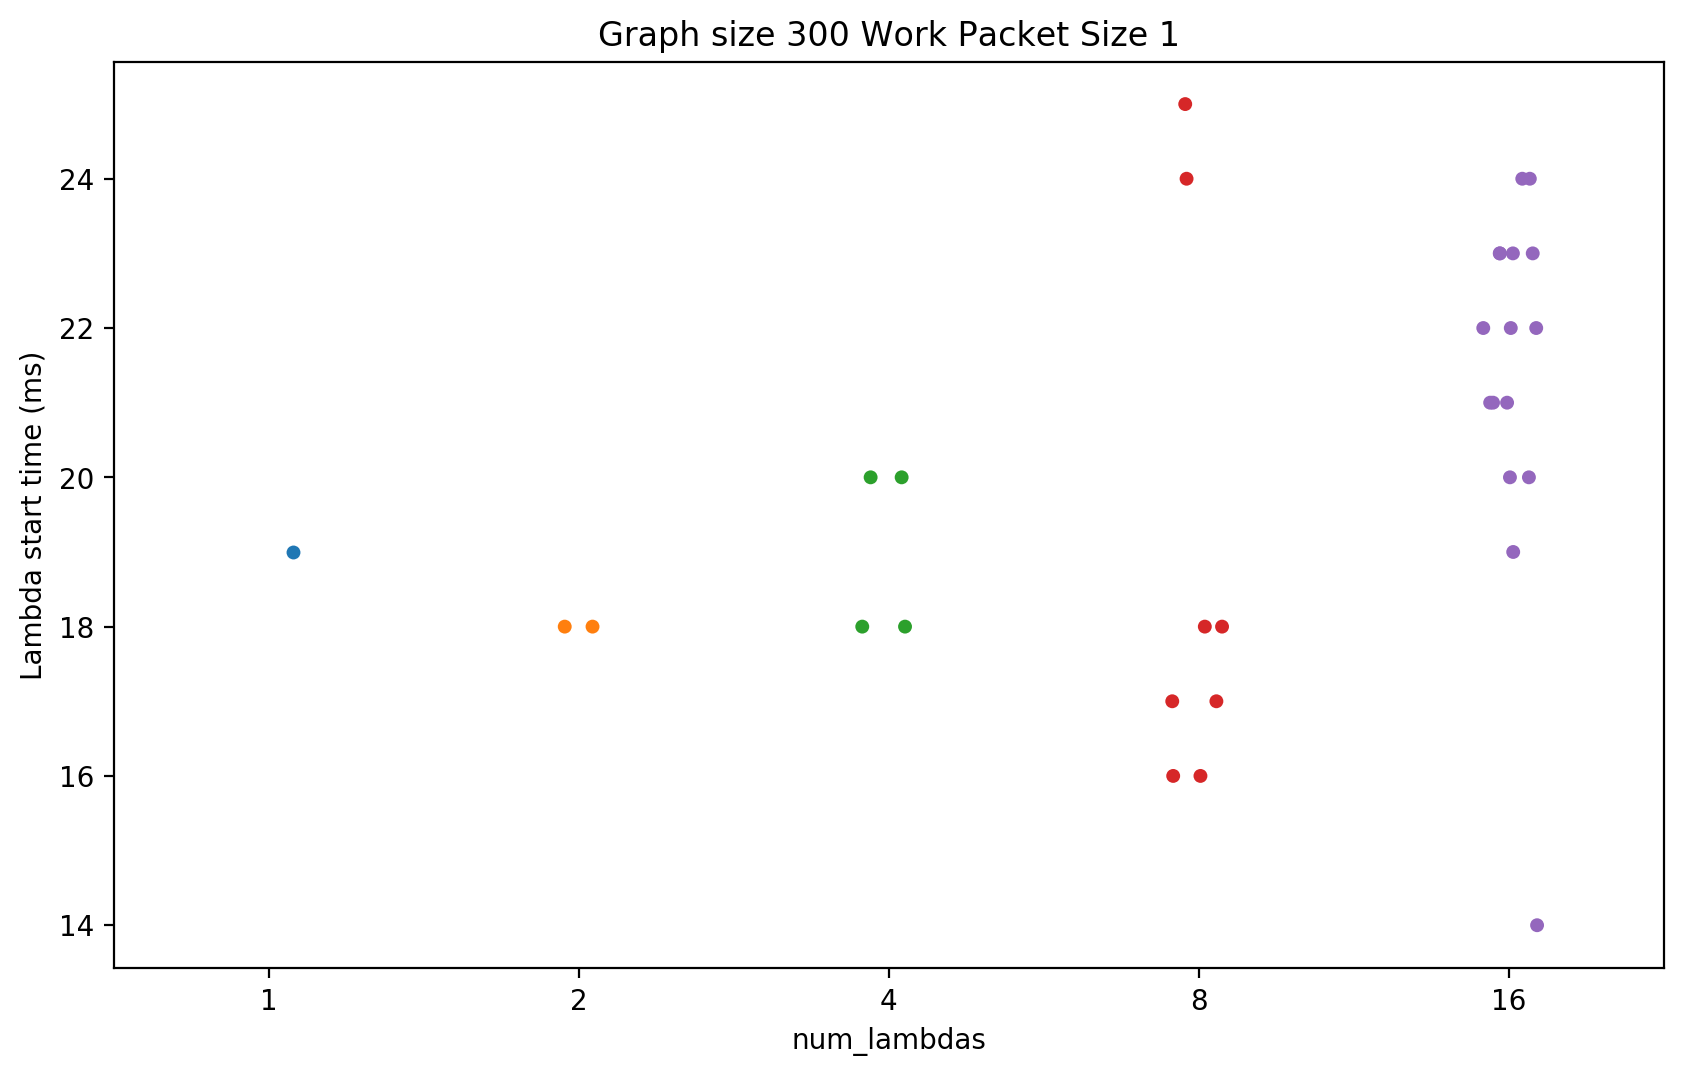

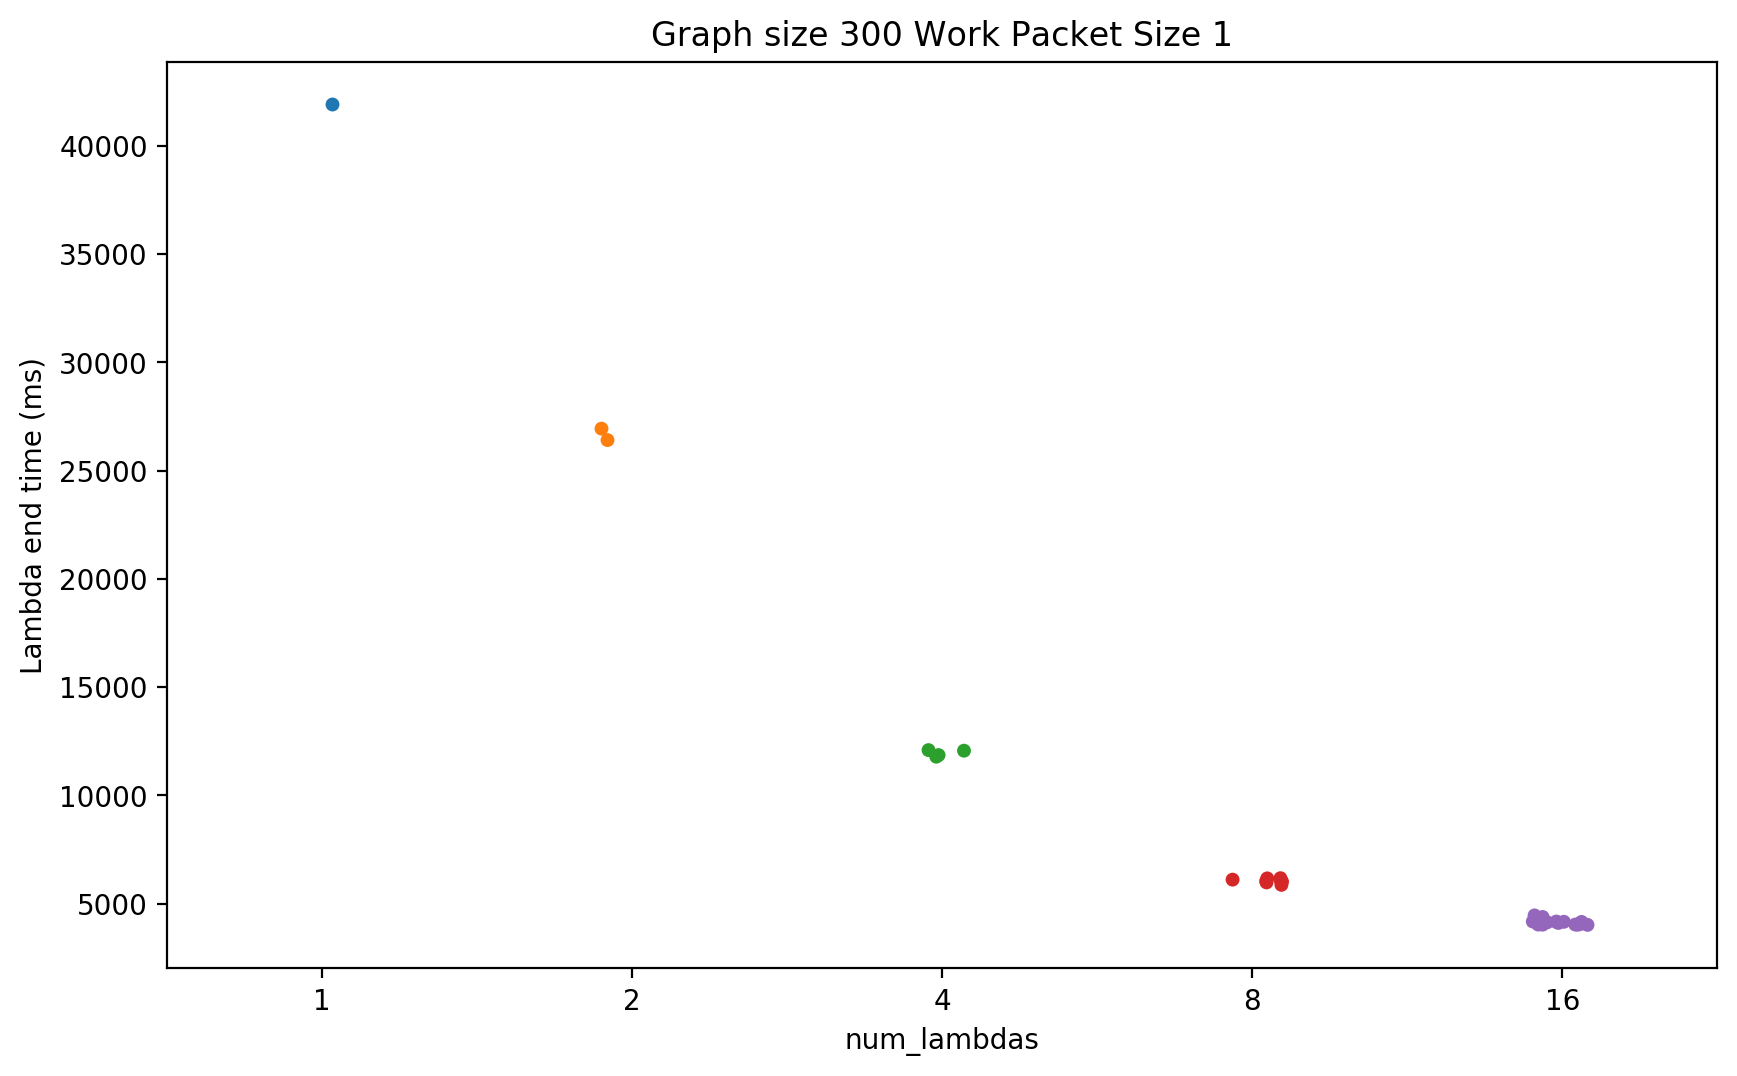

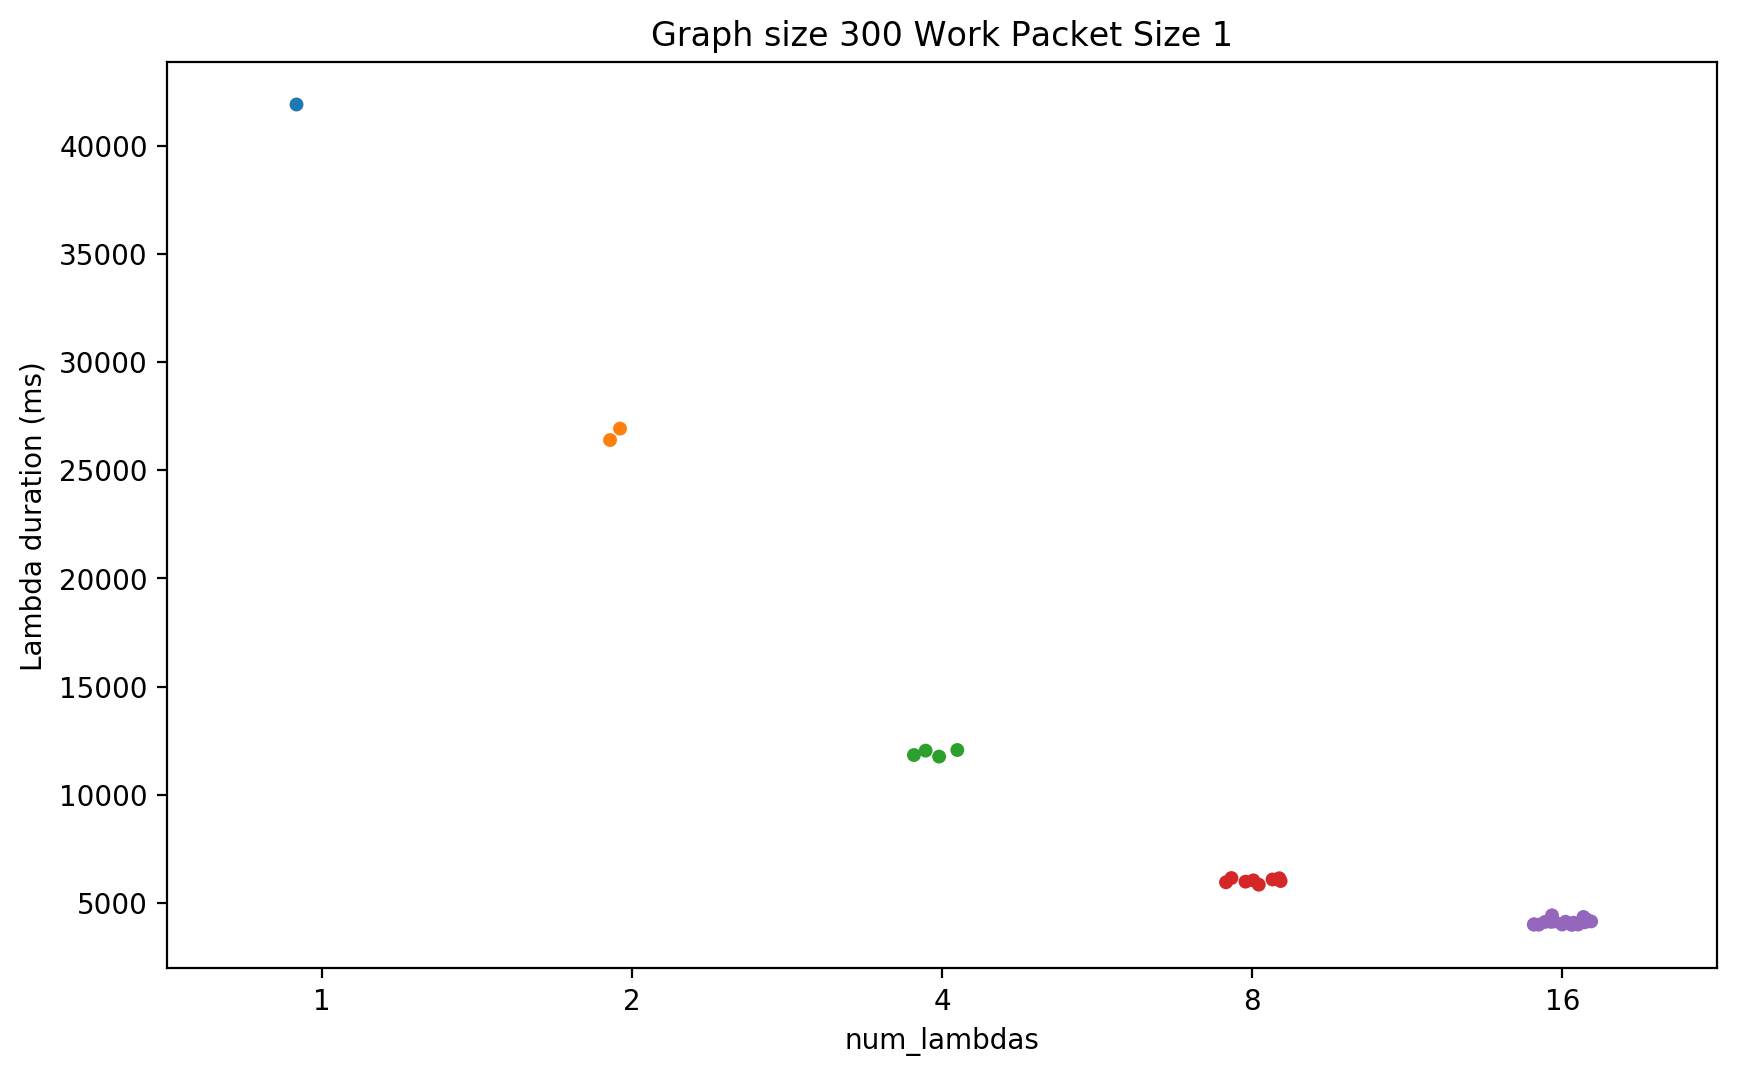

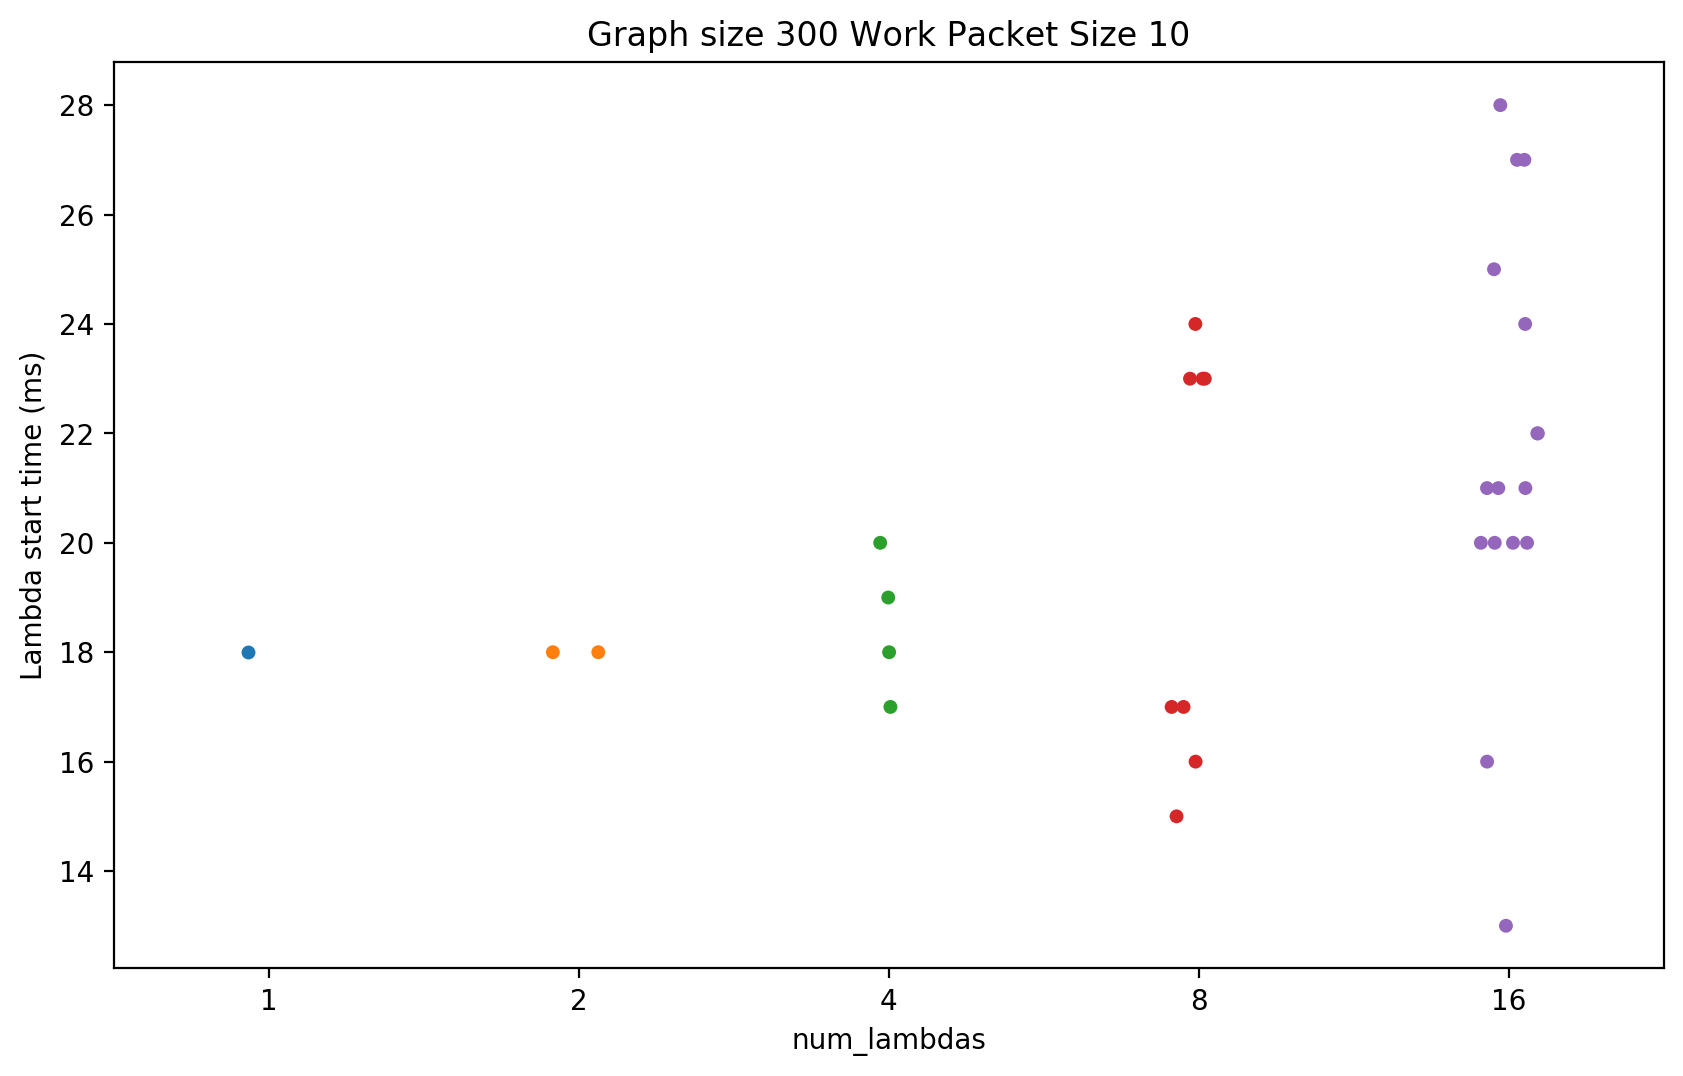

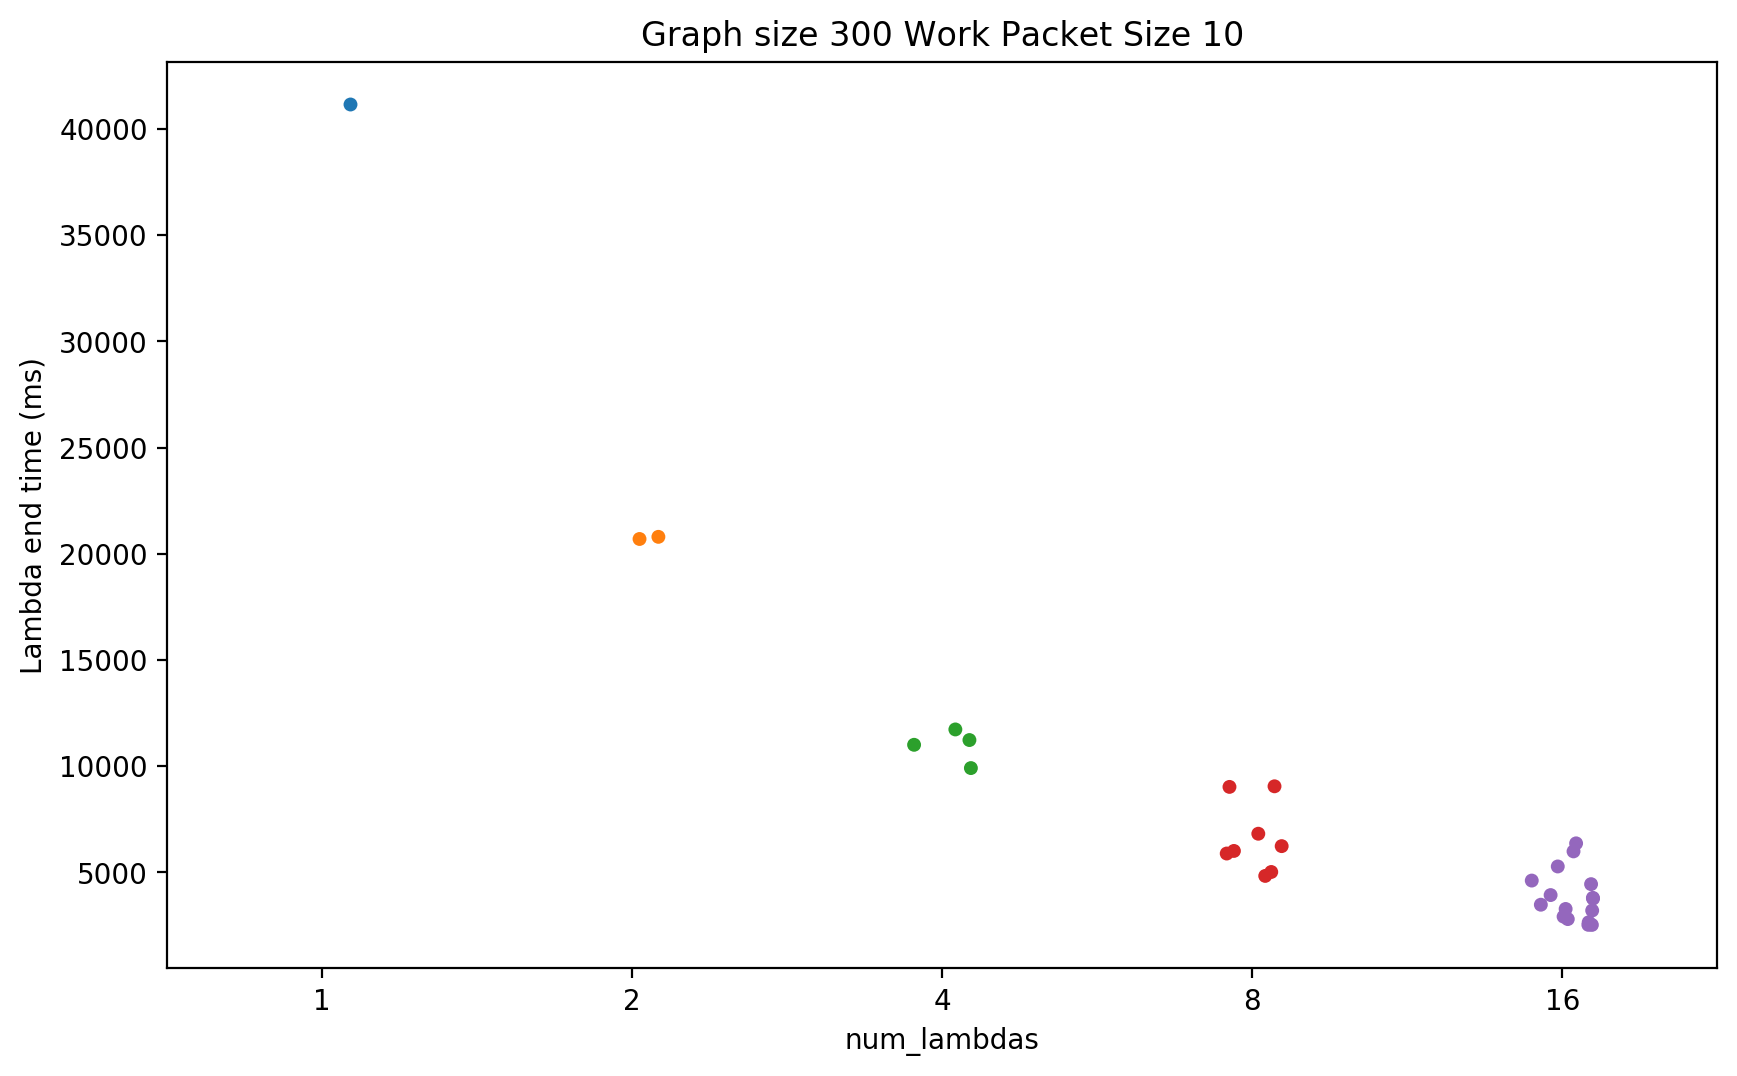

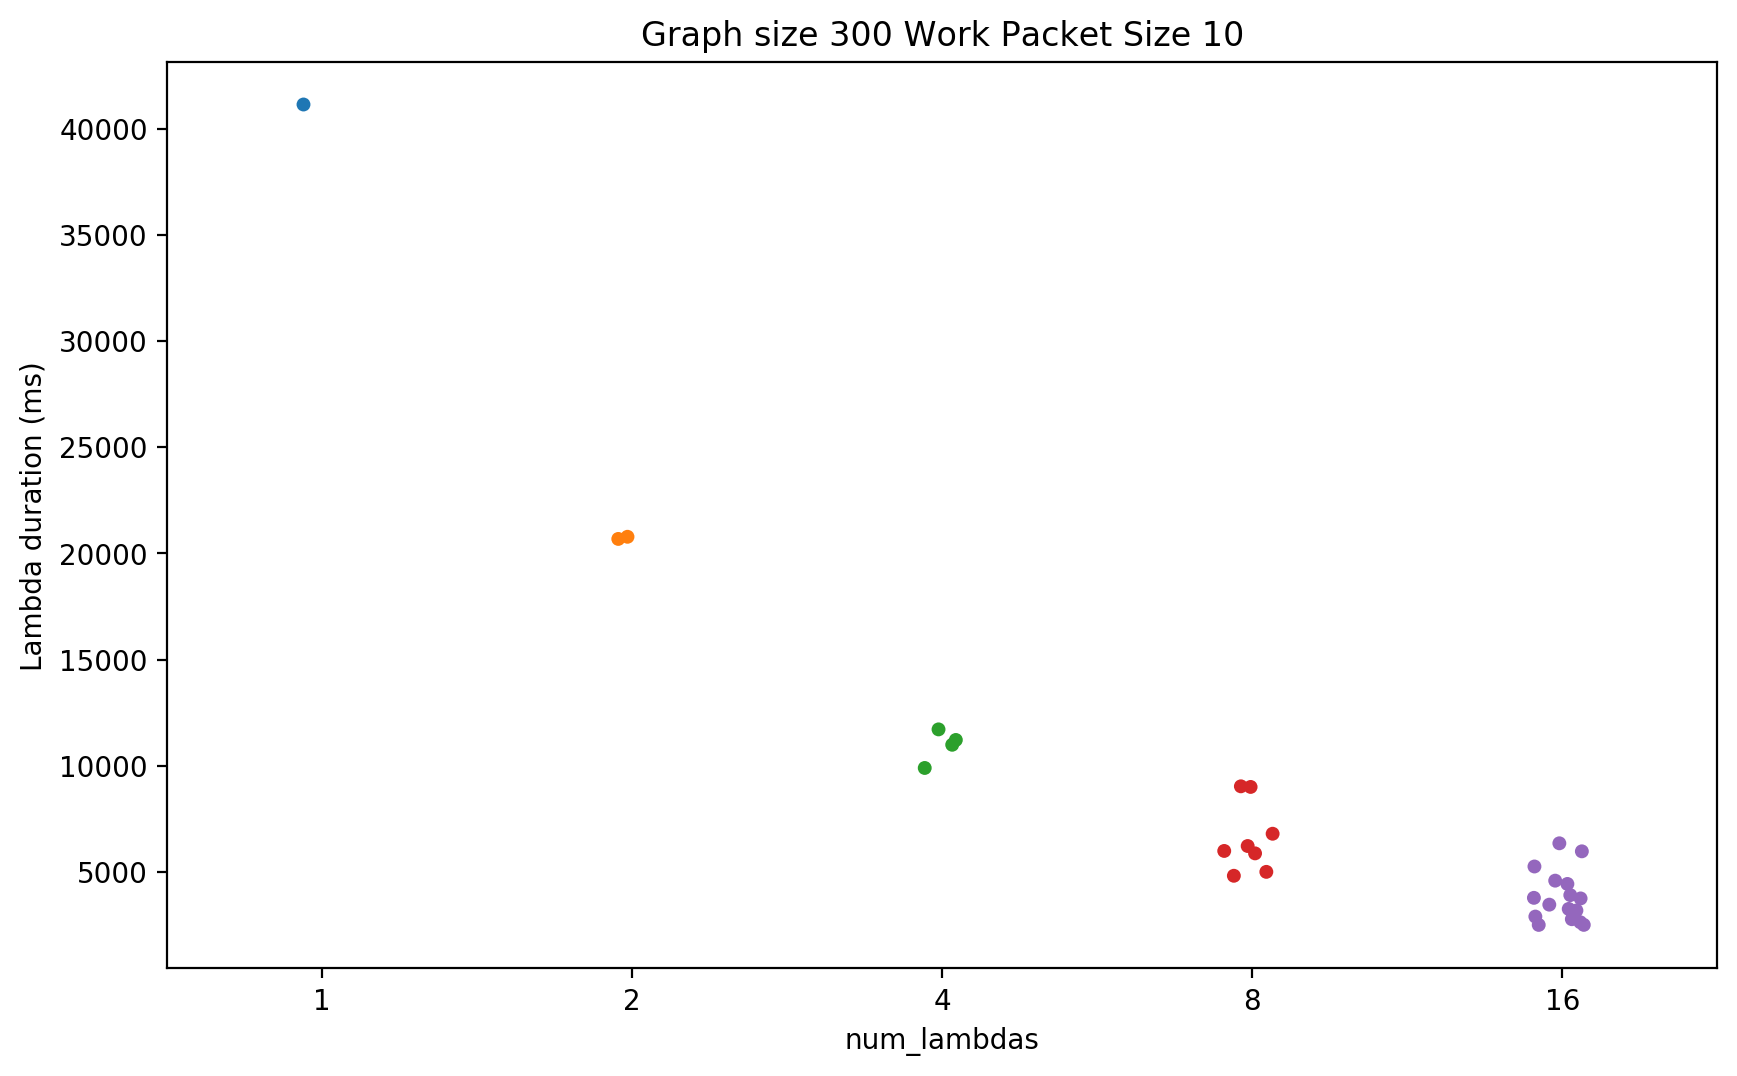

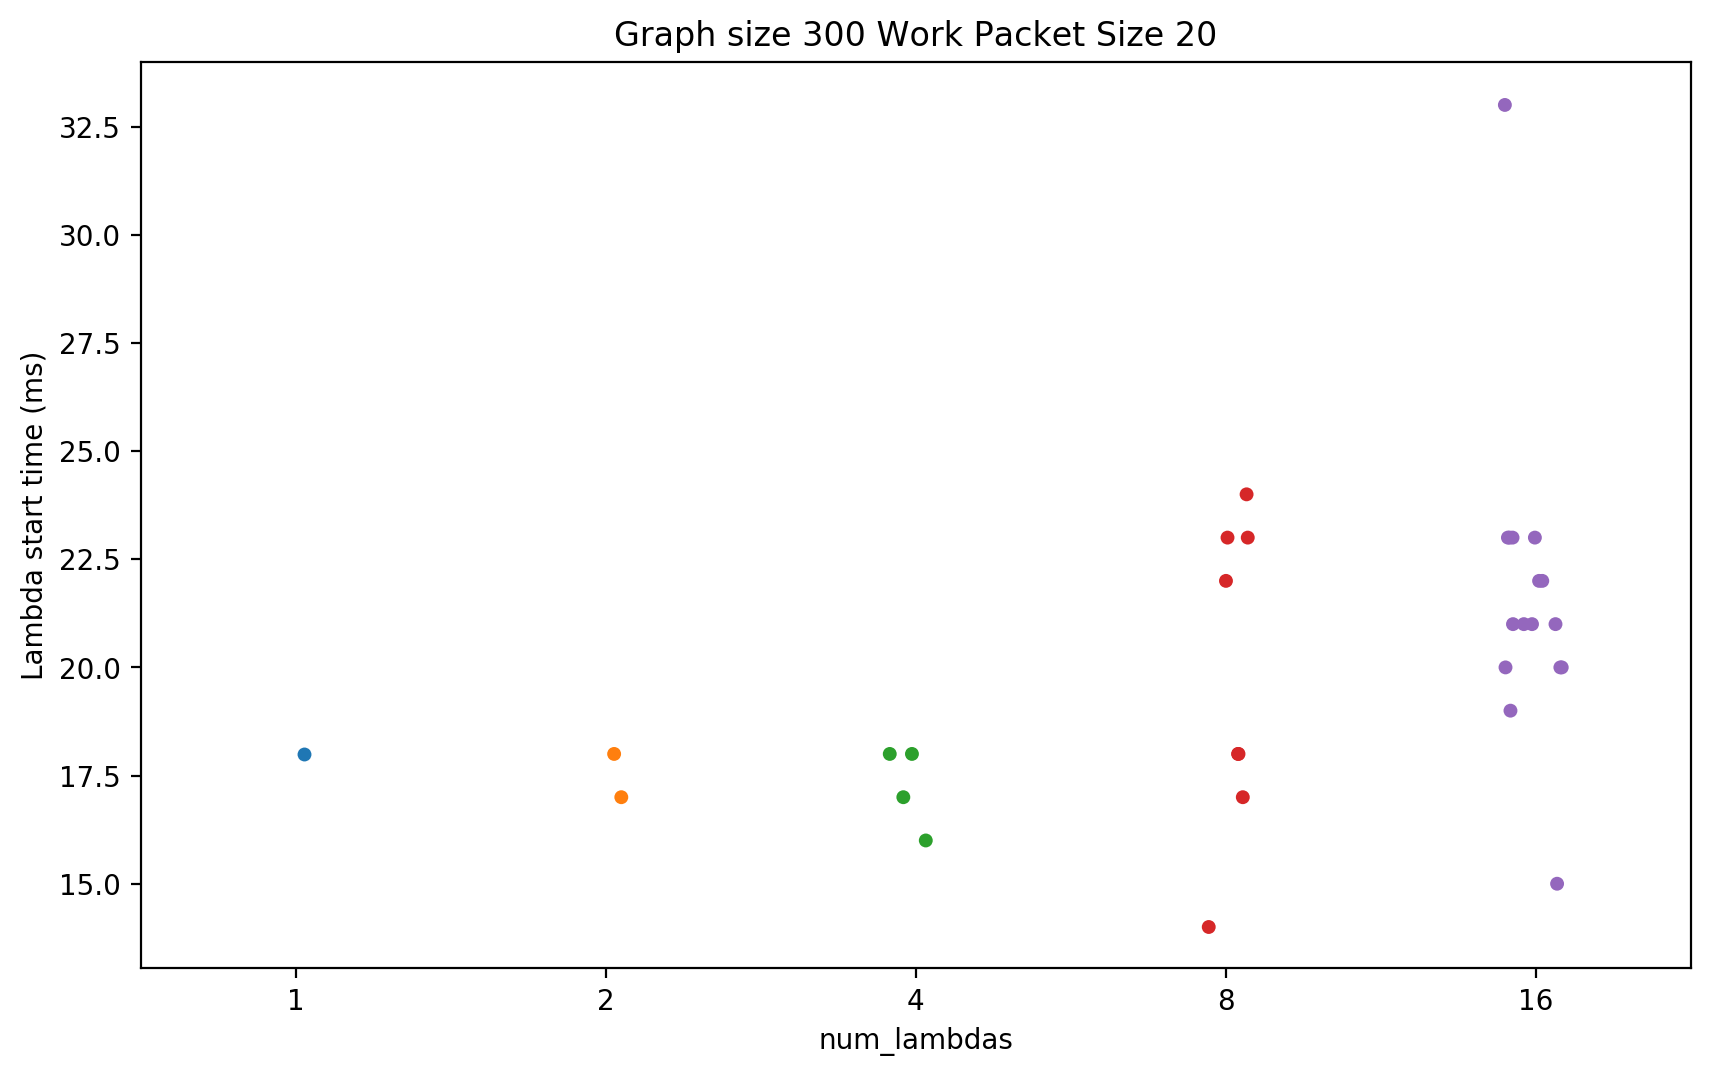

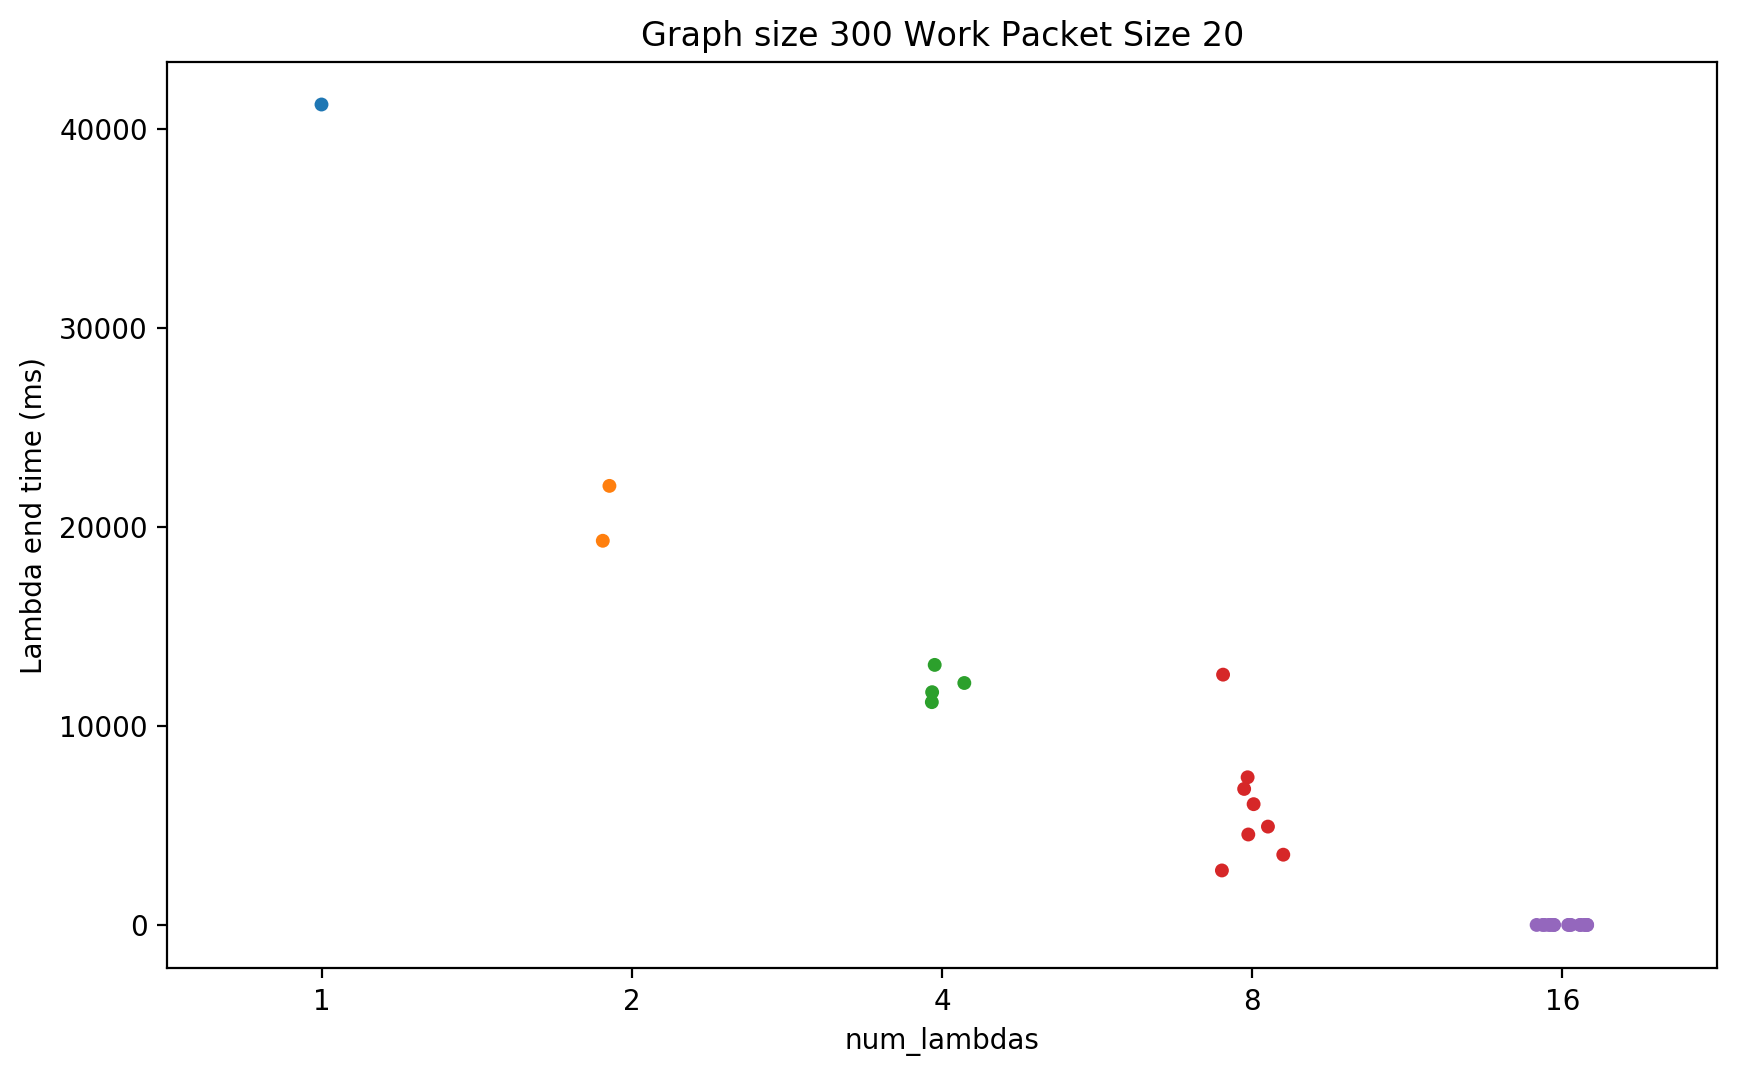

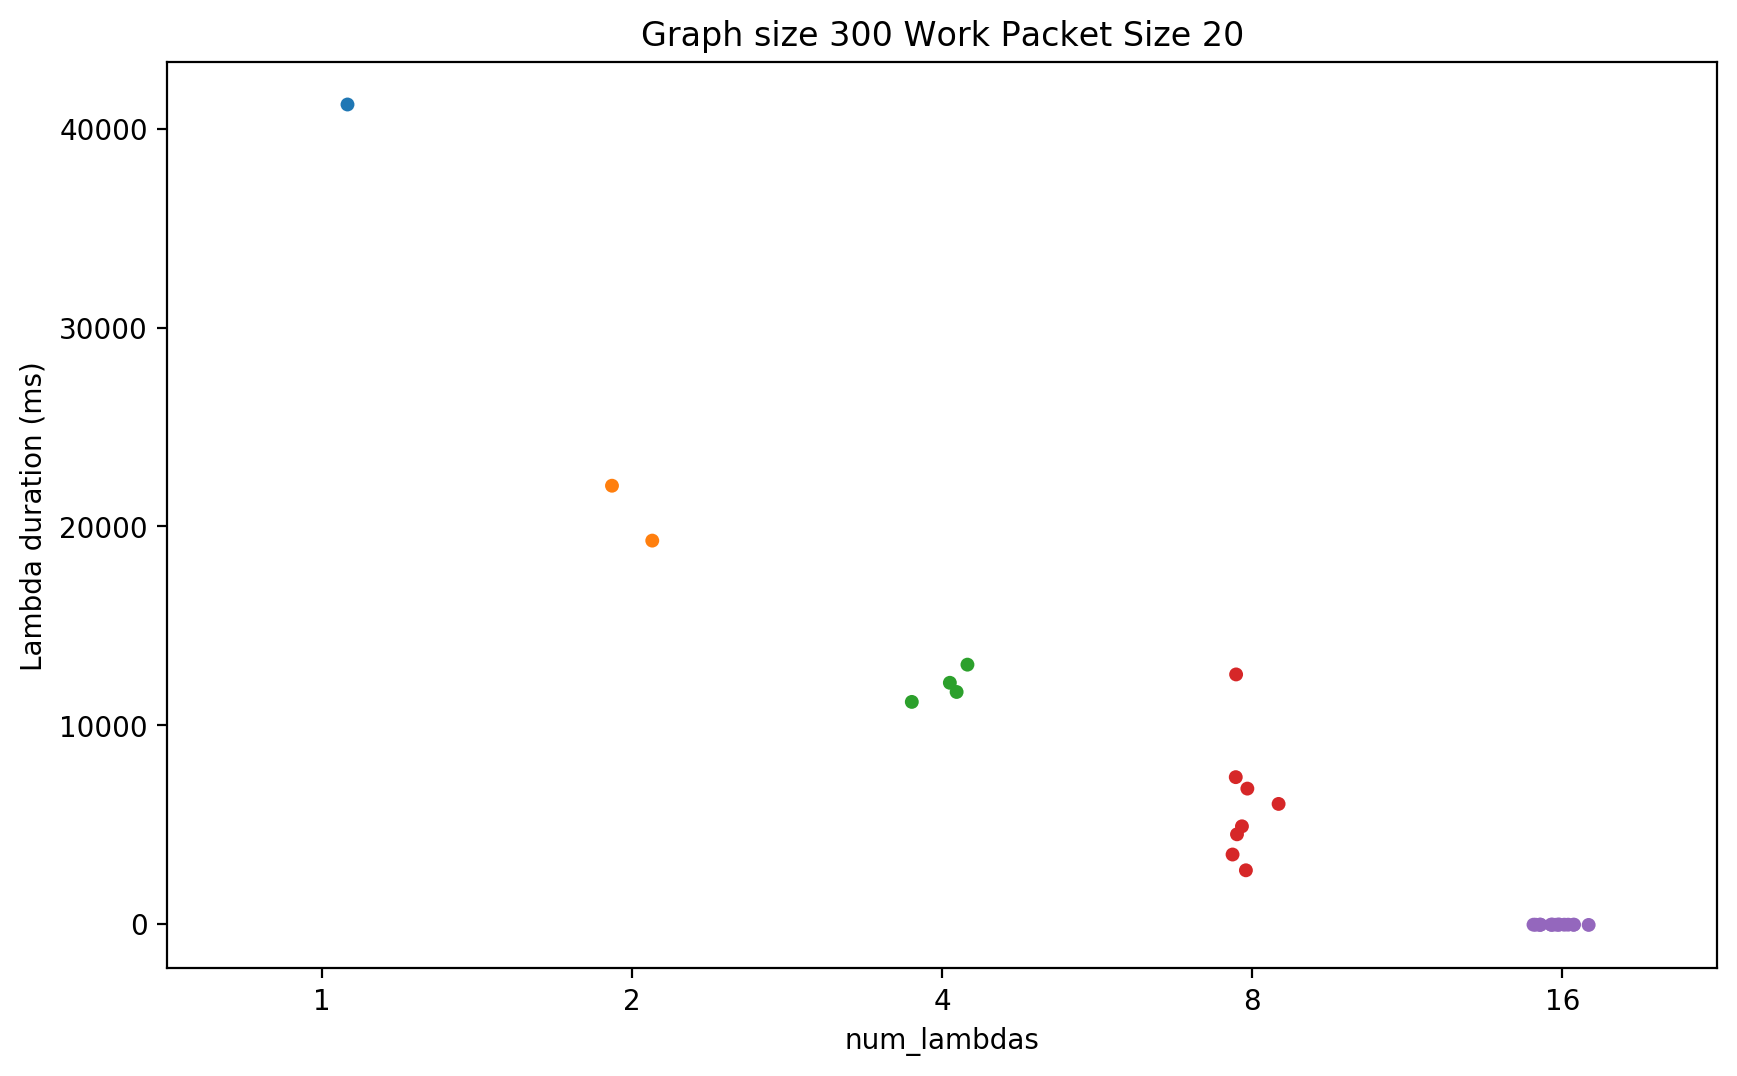

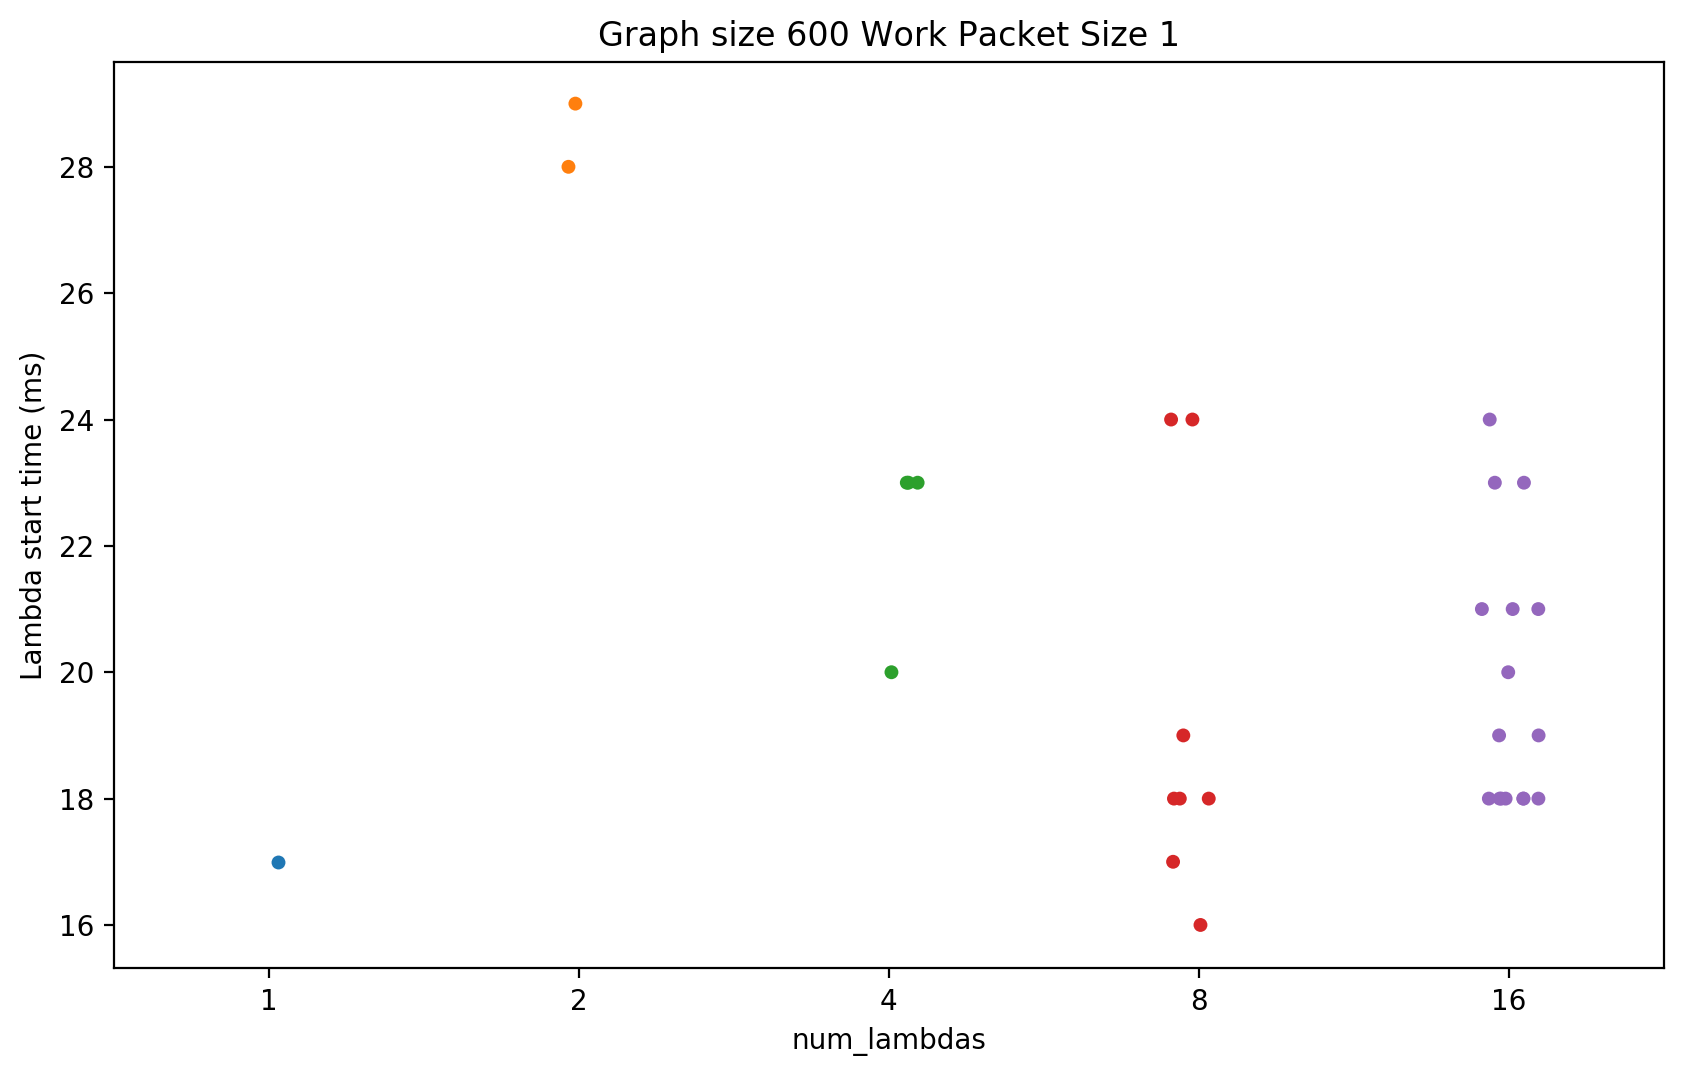

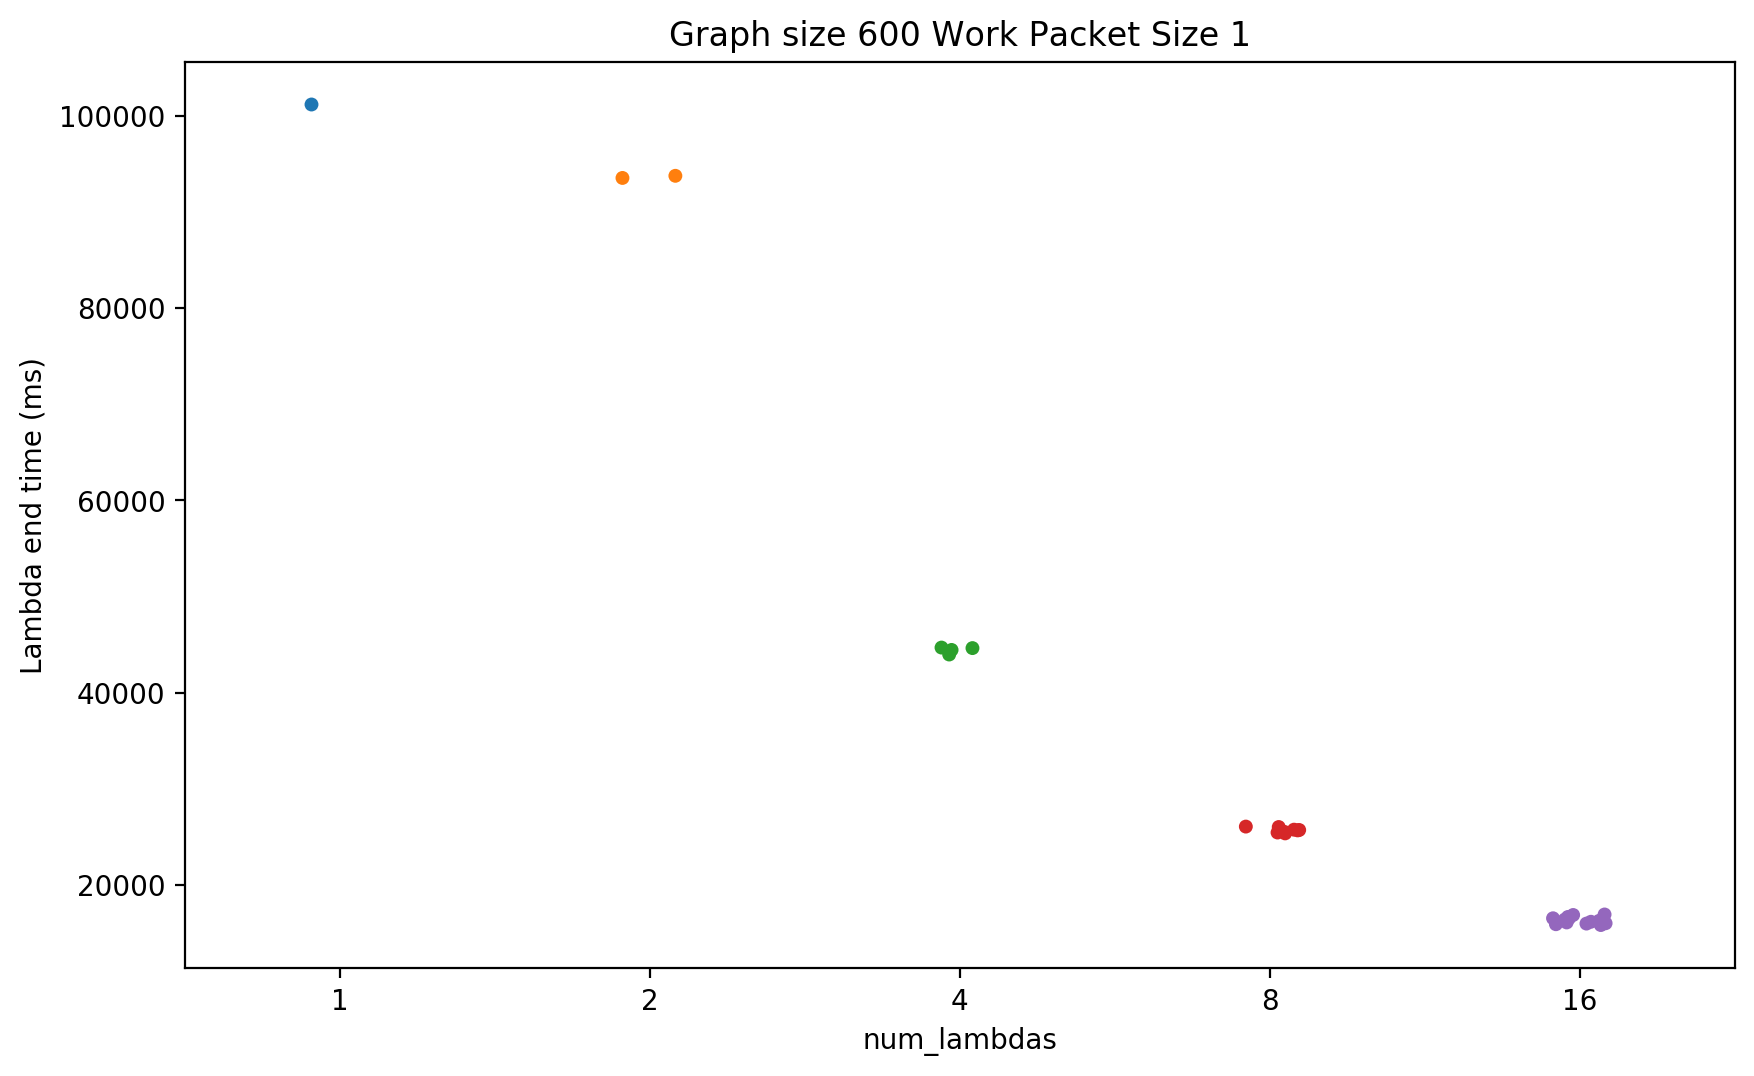

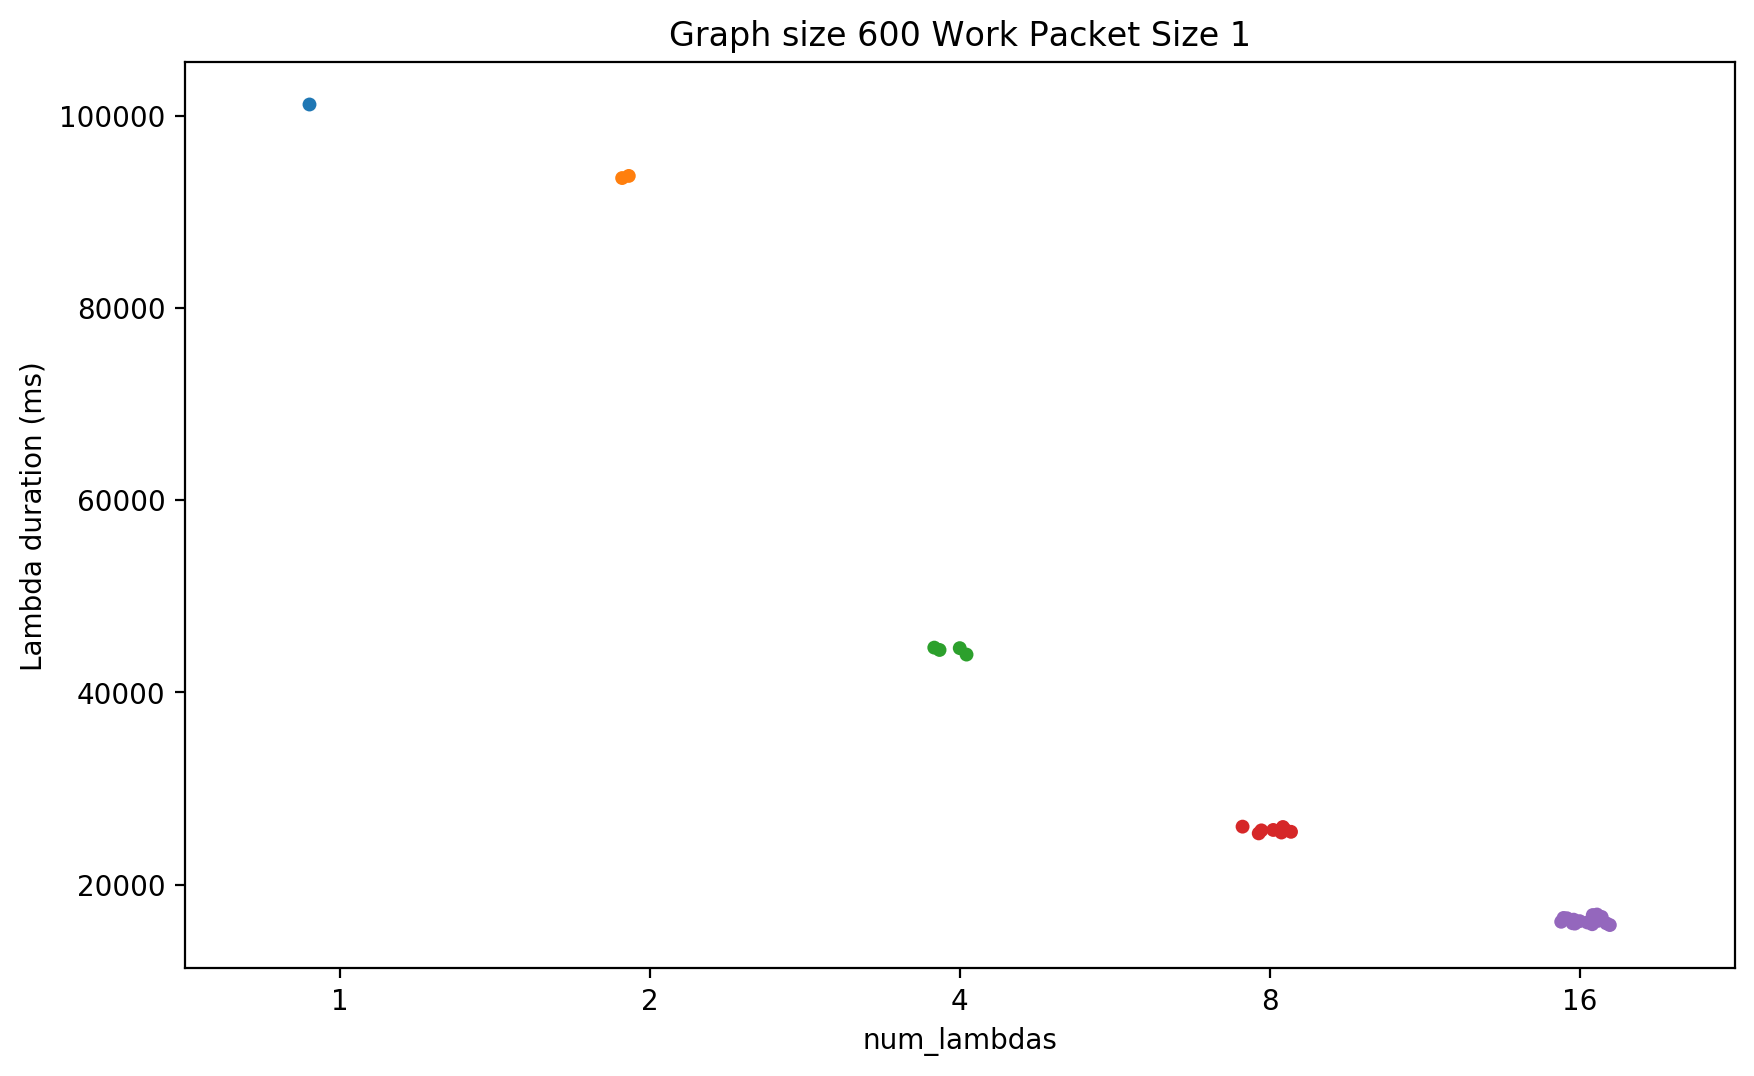

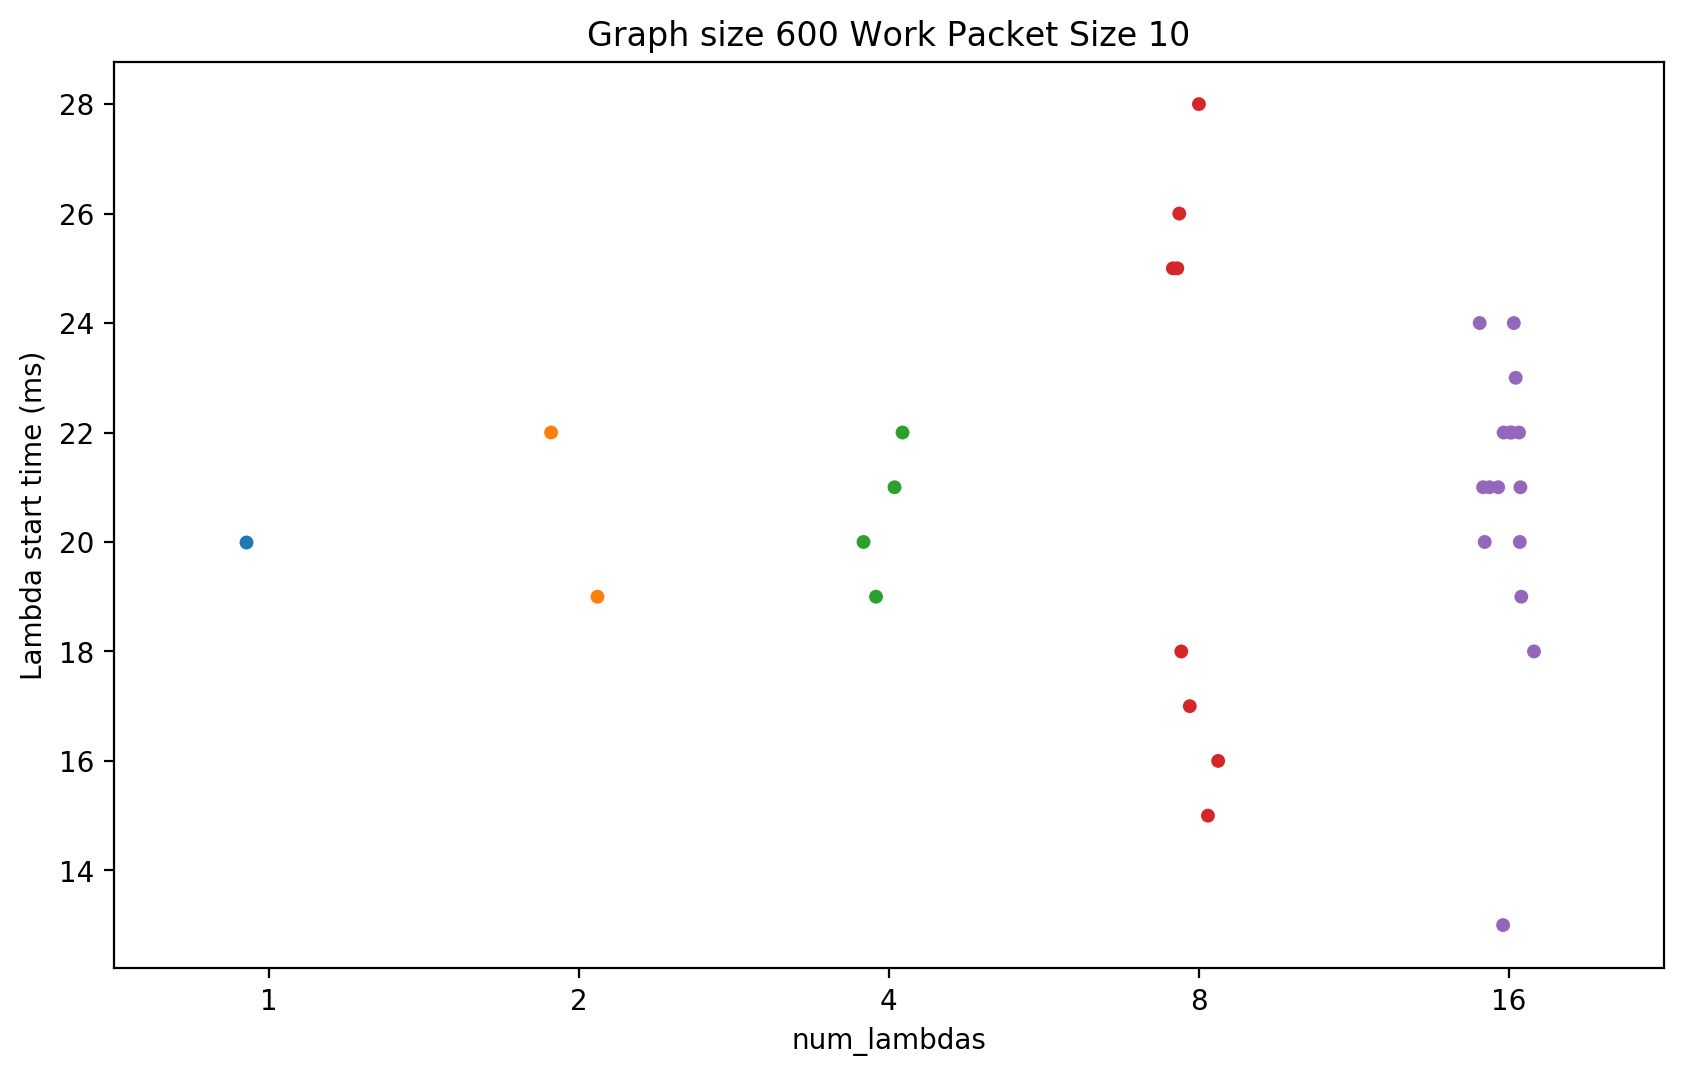

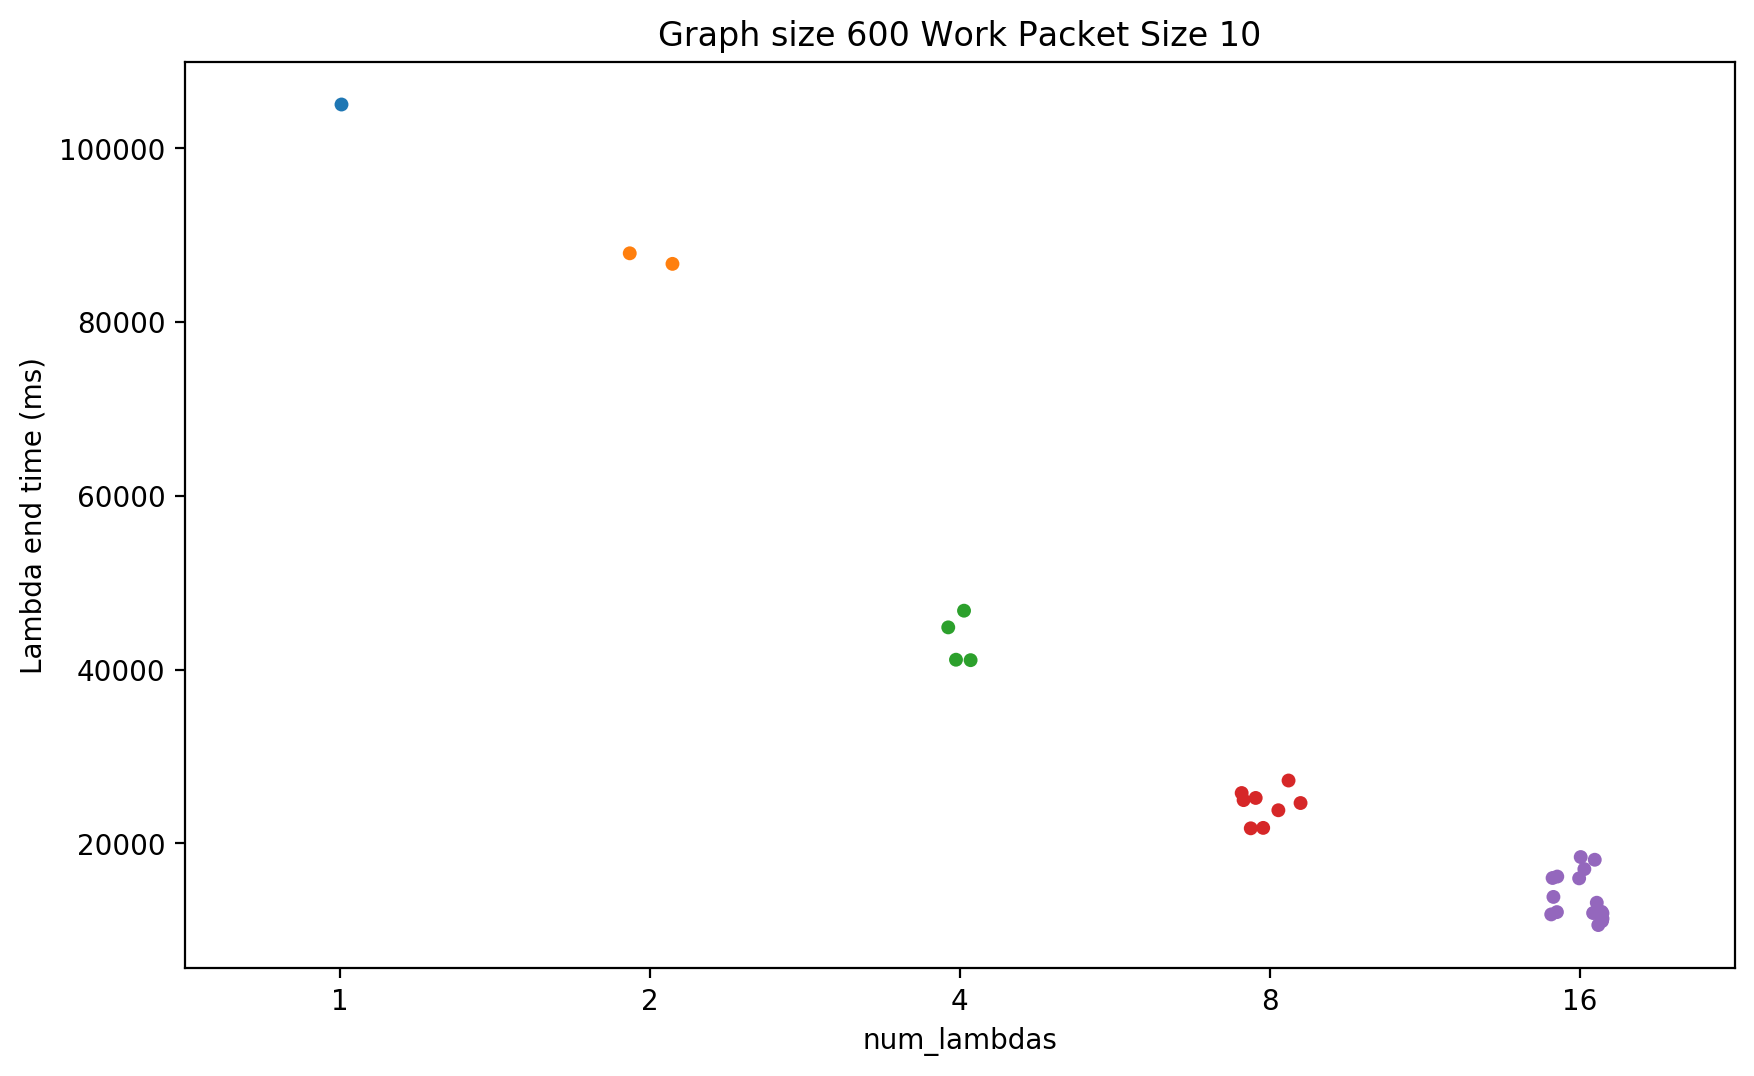

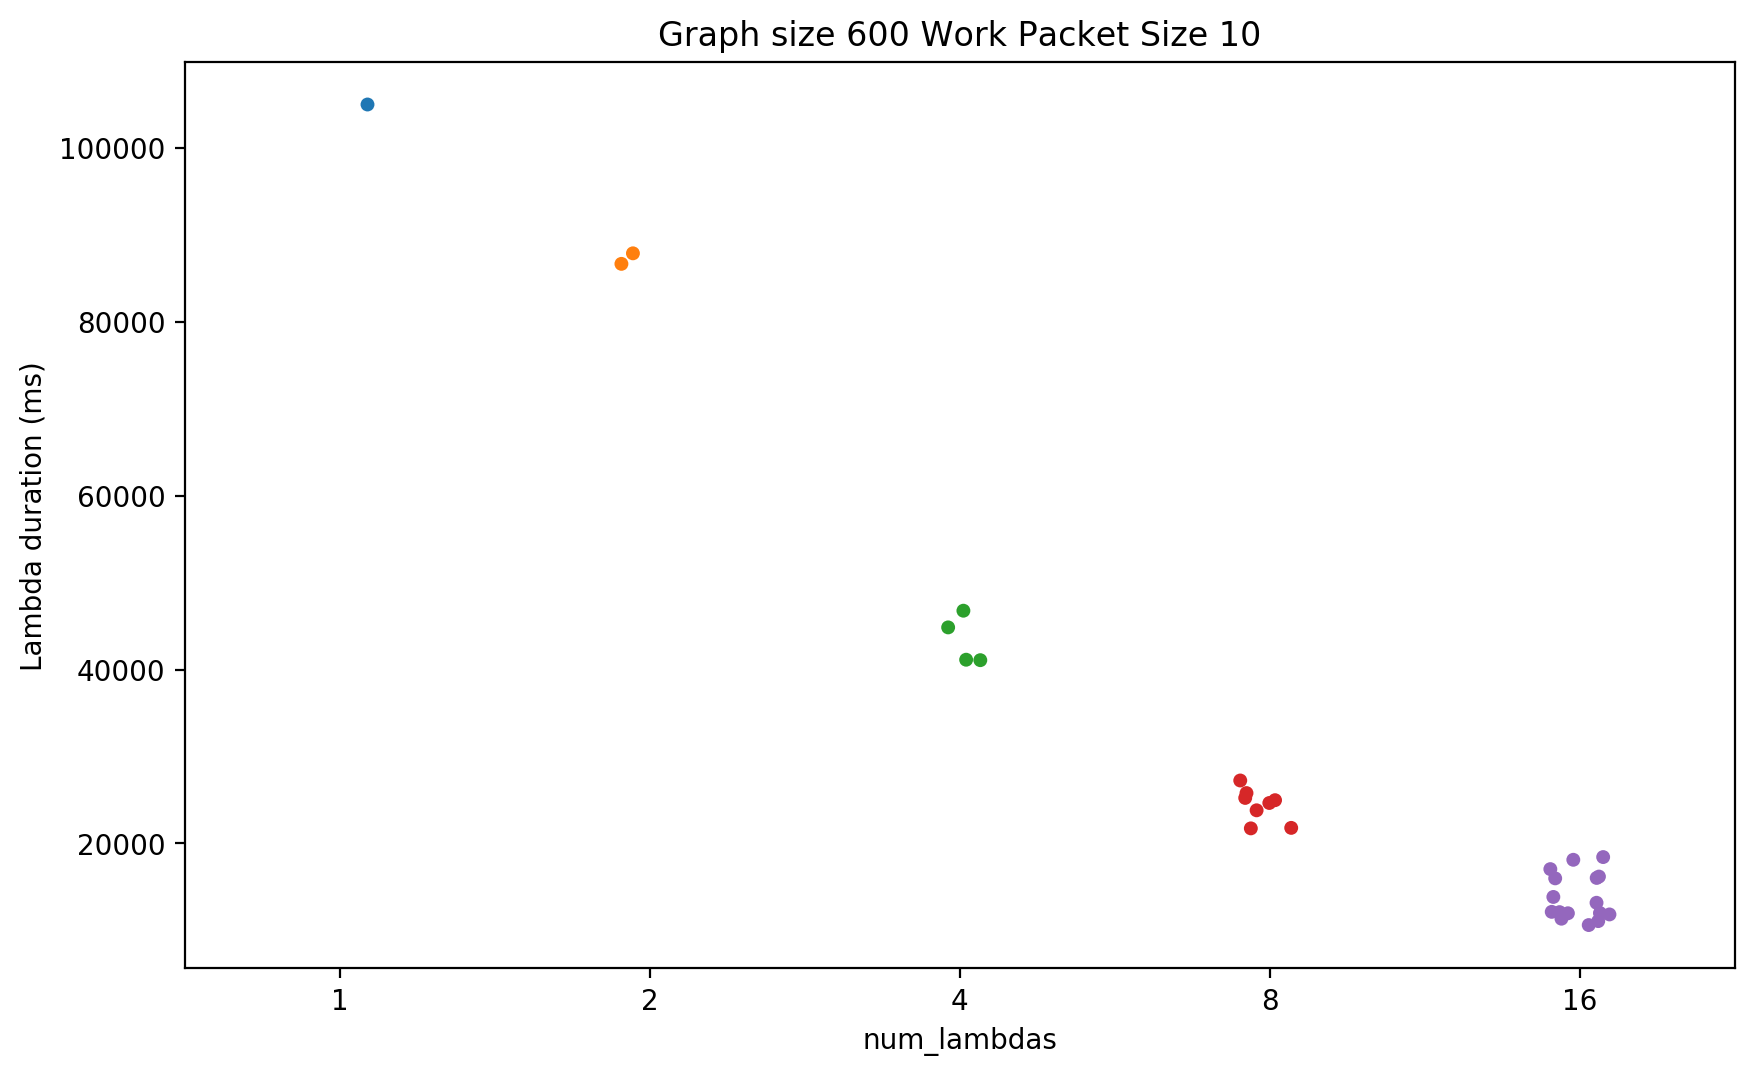

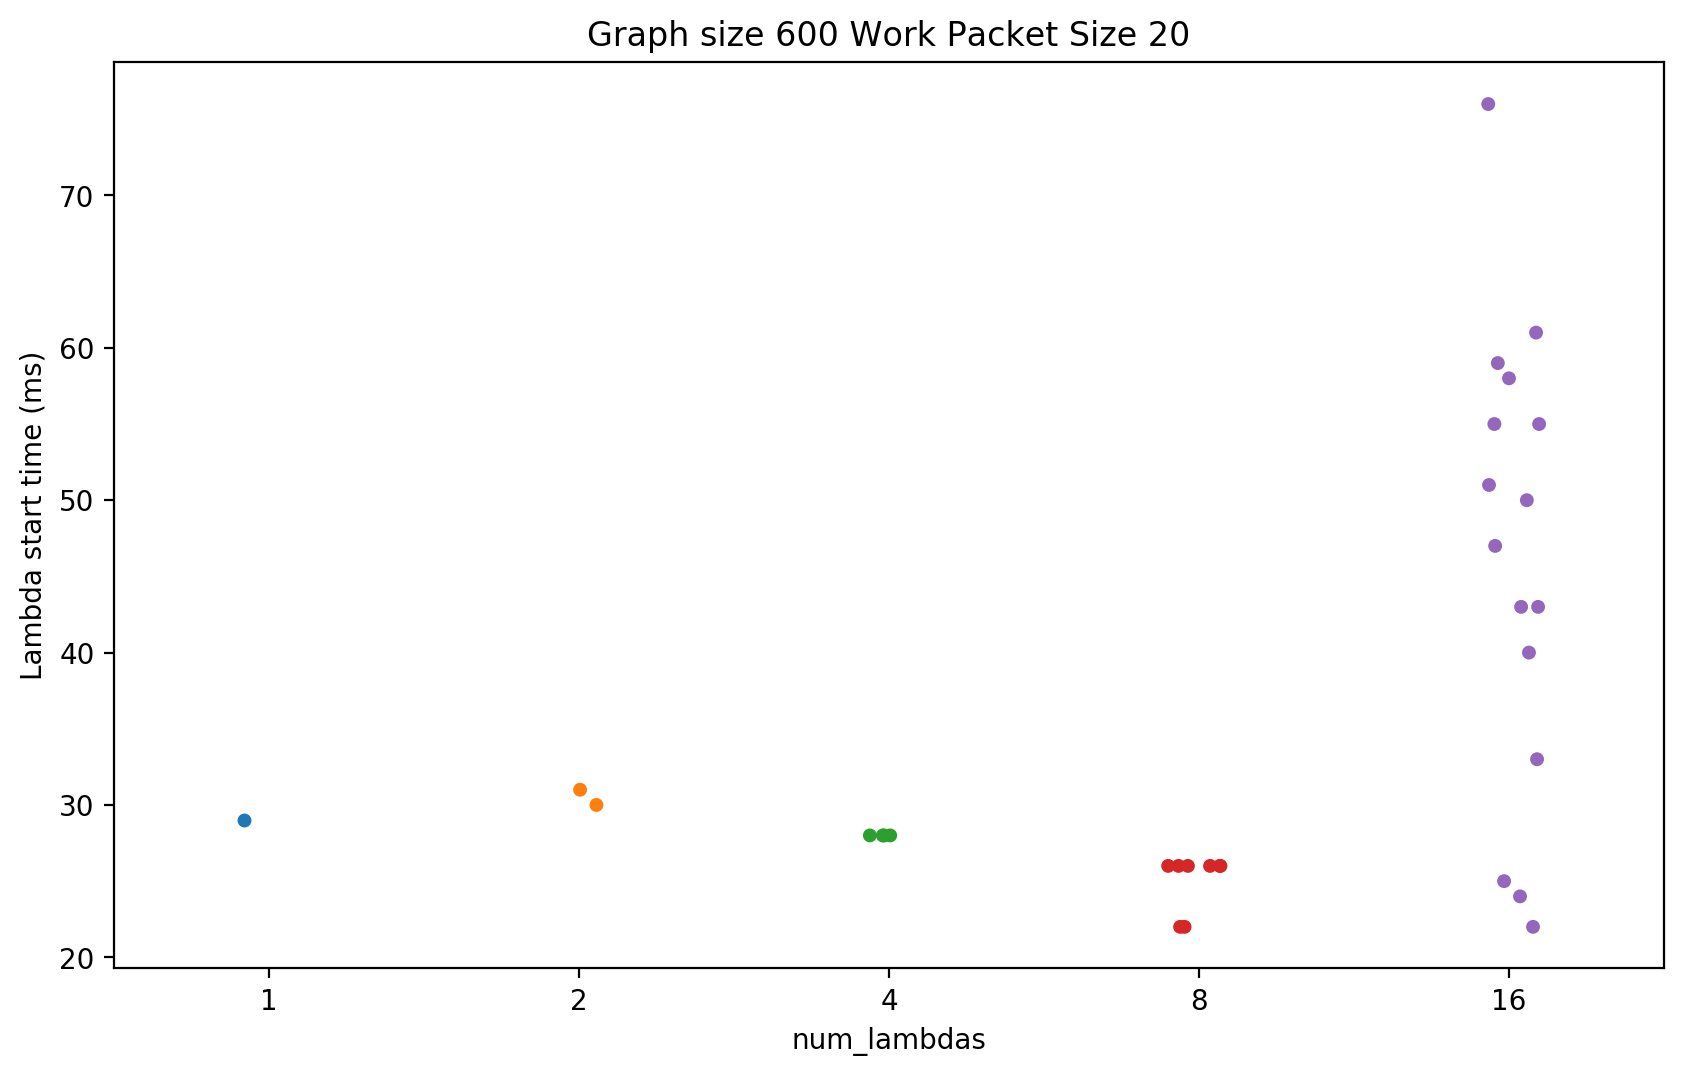

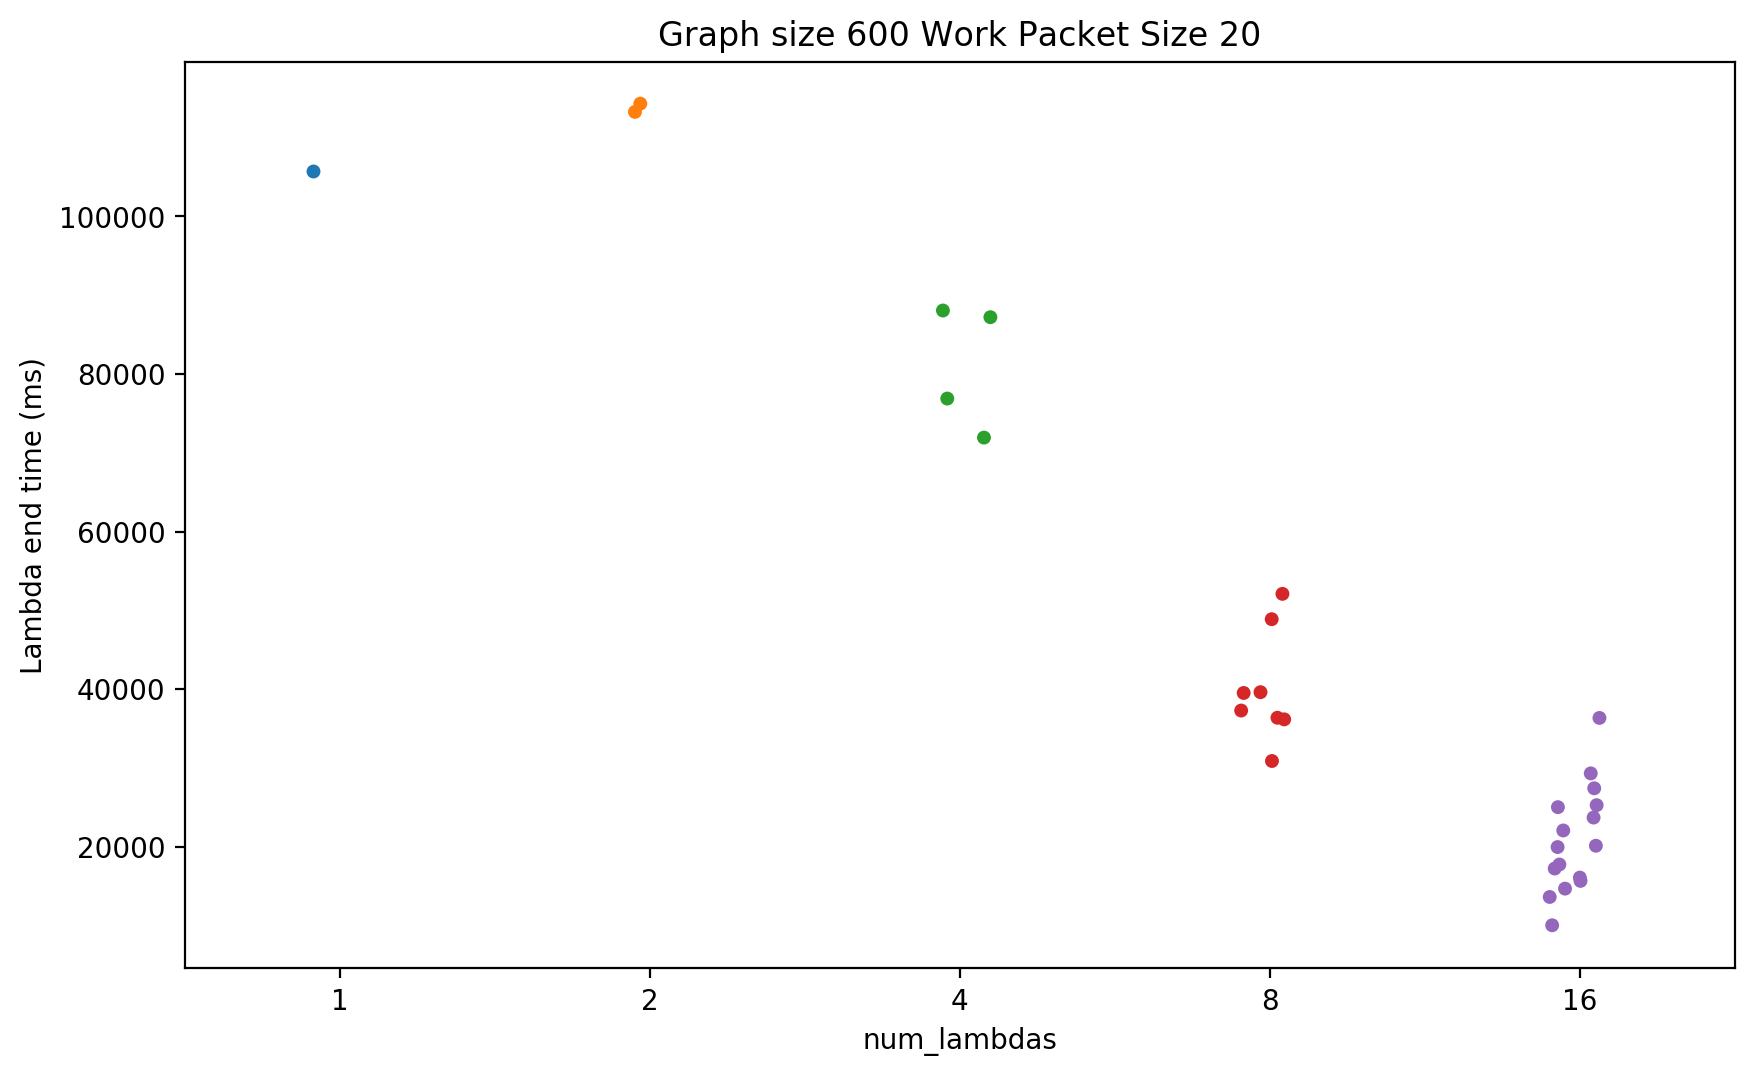

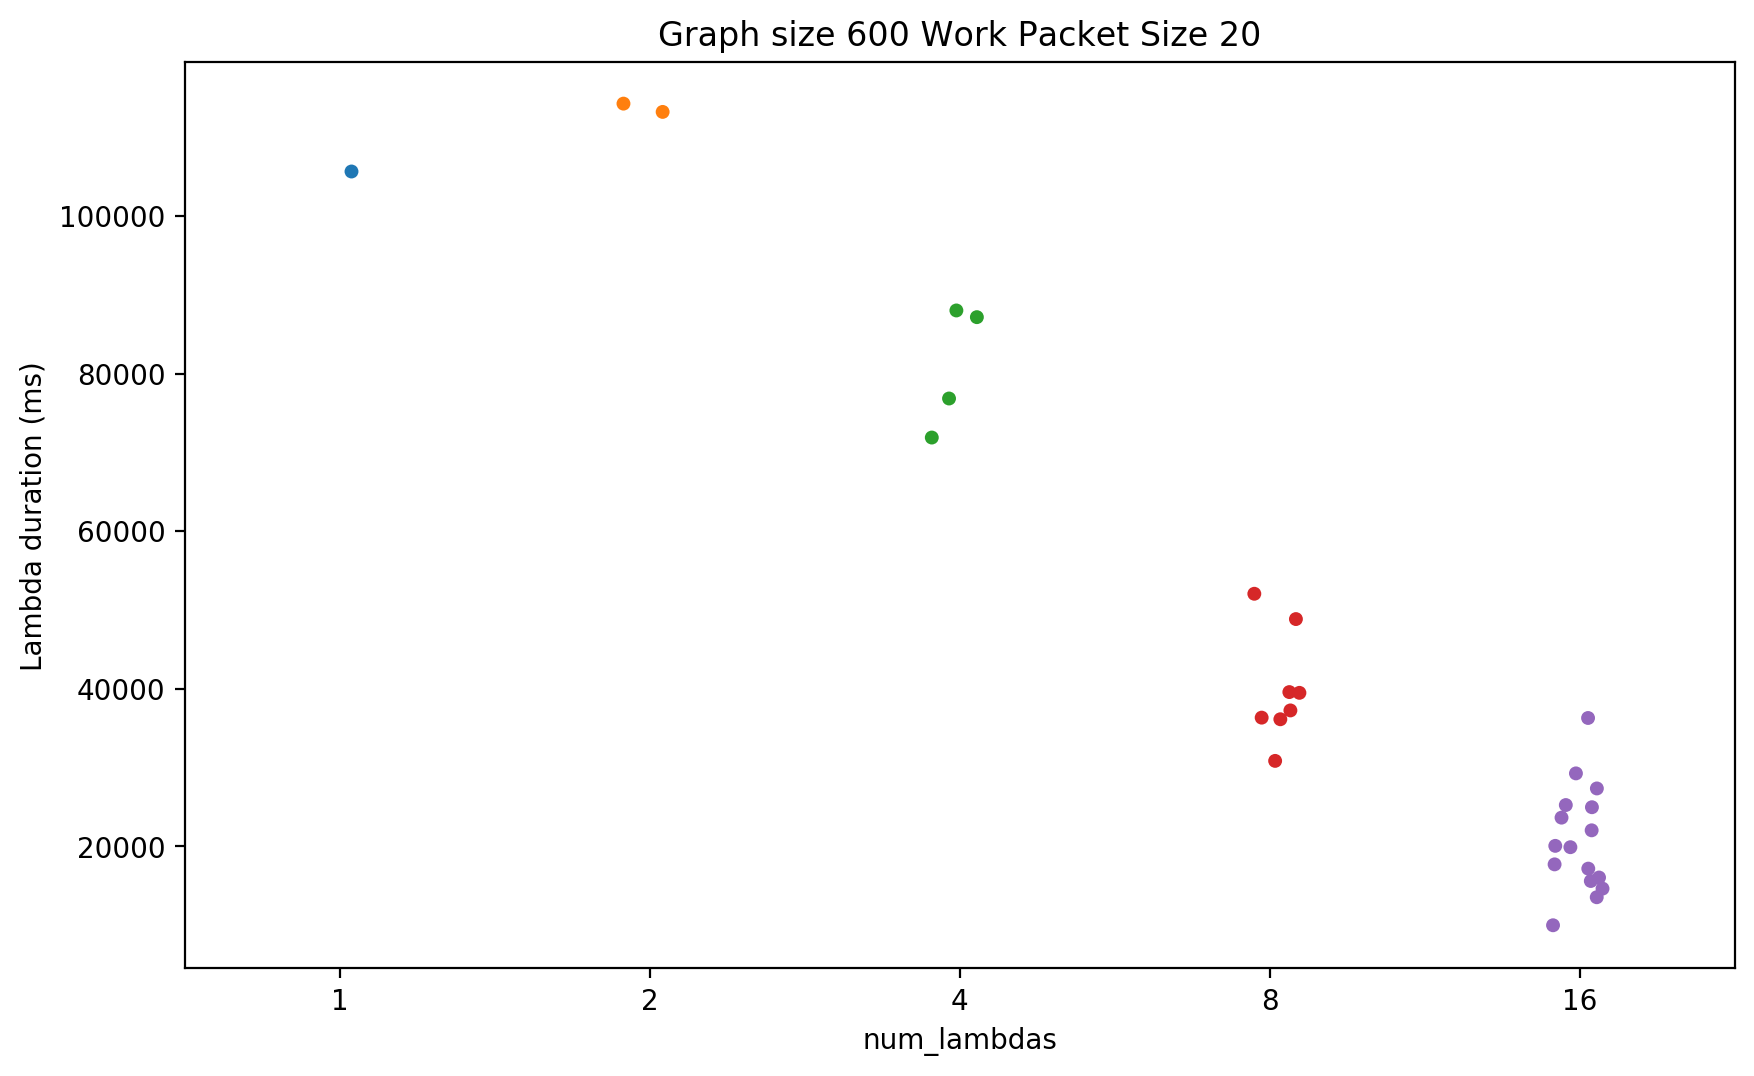

In [27]:
for (graph_size, num_sample), group in df.groupby(["graph_size", "num_samples"]):
    group = group.reset_index()
    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_start_time", x="num_lambdas", data=group)
    plt.ylabel("Lambda start time (ms)")
    plt.title("Graph size {} Work Packet Size {}".format(graph_size, num_sample))
    plt.savefig("{}/lambda_start_times_graph_size_{}_num_sample_{}.pdf".format(SAVE_ROOT, graph_size, num_sample))
    plt.show()

    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_end_time", x="num_lambdas", data=group)
    plt.ylabel("Lambda end time (ms)")
    plt.title("Graph size {} Work Packet Size {}".format(graph_size, num_sample))
    plt.savefig("{}/lambda_end_times_graph_size_{}_num_sample_{}.pdf".format(SAVE_ROOT, graph_size, num_sample))
    plt.show()


    plt.figure(figsize=(10, 6), dpi=200)
    sns.stripplot(y="lambda_duration", x="num_lambdas", data=group)
    plt.ylabel("Lambda duration (ms)")
    plt.title("Graph size {} Work Packet Size {}".format(graph_size, num_sample))
    plt.savefig("{}/lambda_duration_graph_size_{}_num_sample_{}.pdf".format(SAVE_ROOT, graph_size, num_sample))
    plt.show()



### Graph Size Comparisons

In [3]:
df = pd.read_csv("{}/graph_size_data.csv".format(ROOT))
df['num_lambdas-num_samples'] = list(zip(df.num_lambdas, df.num_samples))
df = df[df["scenario"] == scenario]
df = df[df["algorithm"].isin(algorithm_names.keys())]
df

,Unnamed: 0,algorithm,max_global_samples,num_edges,num_lambdas,num_samples,num_vertices,scenario,time_limit,total_size,num_lambdas-num_samples
0,0,prm_common_seed,15320,174274,8,10,6935,fetch1,30.0,181209,"(8, 10)"
1,1,prm_common_seed,14060,155420,8,10,6551,fetch1,27.0,161971,"(8, 10)"
2,2,prm_common_seed,12980,136912,8,10,6010,fetch1,24.0,142922,"(8, 10)"
3,3,prm_common_seed,11700,118512,8,10,5406,fetch1,21.0,123918,"(8, 10)"
4,4,prm_common_seed,10360,100402,8,10,4872,fetch1,18.0,105274,"(8, 10)"
5,5,prm_common_seed,9070,82472,8,10,4252,fetch1,15.0,86724,"(8, 10)"
6,6,prm_common_seed,7700,64794,8,10,3644,fetch1,12.0,68438,"(8, 10)"
7,7,prm_common_seed,6270,47536,8,10,2921,fetch1,9.0,50457,"(8, 10)"
8,8,prm_common_seed,4560,30958,8,10,2213,fetch1,6.0,33171,"(8, 10)"
9,9,prm_common_seed,2770,15086,8,10,1338,fetch1,3.0,16424,"(8, 10)"


In [4]:
print(sorted(df['num_lambdas-num_samples'].unique()))

[(1, 1), (1, 10), (4, 1), (4, 10), (8, 1), (8, 10), (32, 1), (32, 10), (64, 1), (64, 10), (64, 20), (128, 1), (128, 10), (128, 20)]


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also

    print(df.groupby(['num_lambdas-num_samples', 'time_limit']).nunique()[['Unnamed: 0']]) # unnamed 0 is the count, use this to decide which to plot
# curr_df = df.groupby(['num_lambdas-num_samples', 'time_limit']).nunique()

                                    Unnamed: 0
num_lambdas-num_samples time_limit            
(1, 1)                  3.0                 10
                        6.0                 10
                        9.0                 10
                        12.0                10
                        15.0                10
                        18.0                10
                        21.0                10
                        24.0                10
                        27.0                10
                        30.0                10
(1, 10)                 3.0                 10
                        6.0                 10
                        9.0                 10
                        12.0                10
                        15.0                10
                        18.0                10
                        21.0                10
                        24.0                10
                        27.0                10
             

In [6]:
# plot_pairs = sorted([(1, 1), (4, 1), (8, 1), (32, 1), (64, 1), (64, 10), (32, 10), (8,10), (4,10), (1,10)])
# plot_pairs = sorted([(1, 1), (4,1), (8, 1), (32, 1)])
# plot_pairs = sorted([(32, 1), (32, 10), (32 , 20)])
# plot_pairs = sorted([(64, 1), (64, 10), (32, 10), (32, 1)])
plot_pairs = sorted([(64, 10), (64, 20), (32, 1),  (128, 10), (128, 20)])
plot_pairs_id = "-".join("{}_{}".format(first, second) for first, second in plot_pairs)
SAVE_ROOT = "{}/{}/{}/{}".format(ROOT, scenario, ",".join(sorted(algorithm_names.keys())), plot_pairs_id) #ROOT + "/" + plot_pairs_id
os.makedirs(SAVE_ROOT)
print(plot_pairs_id)

32_1-64_10-64_20-128_10-128_20


In [7]:
df = df[df['num_lambdas-num_samples'].isin(plot_pairs)]

/Users/ragz/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


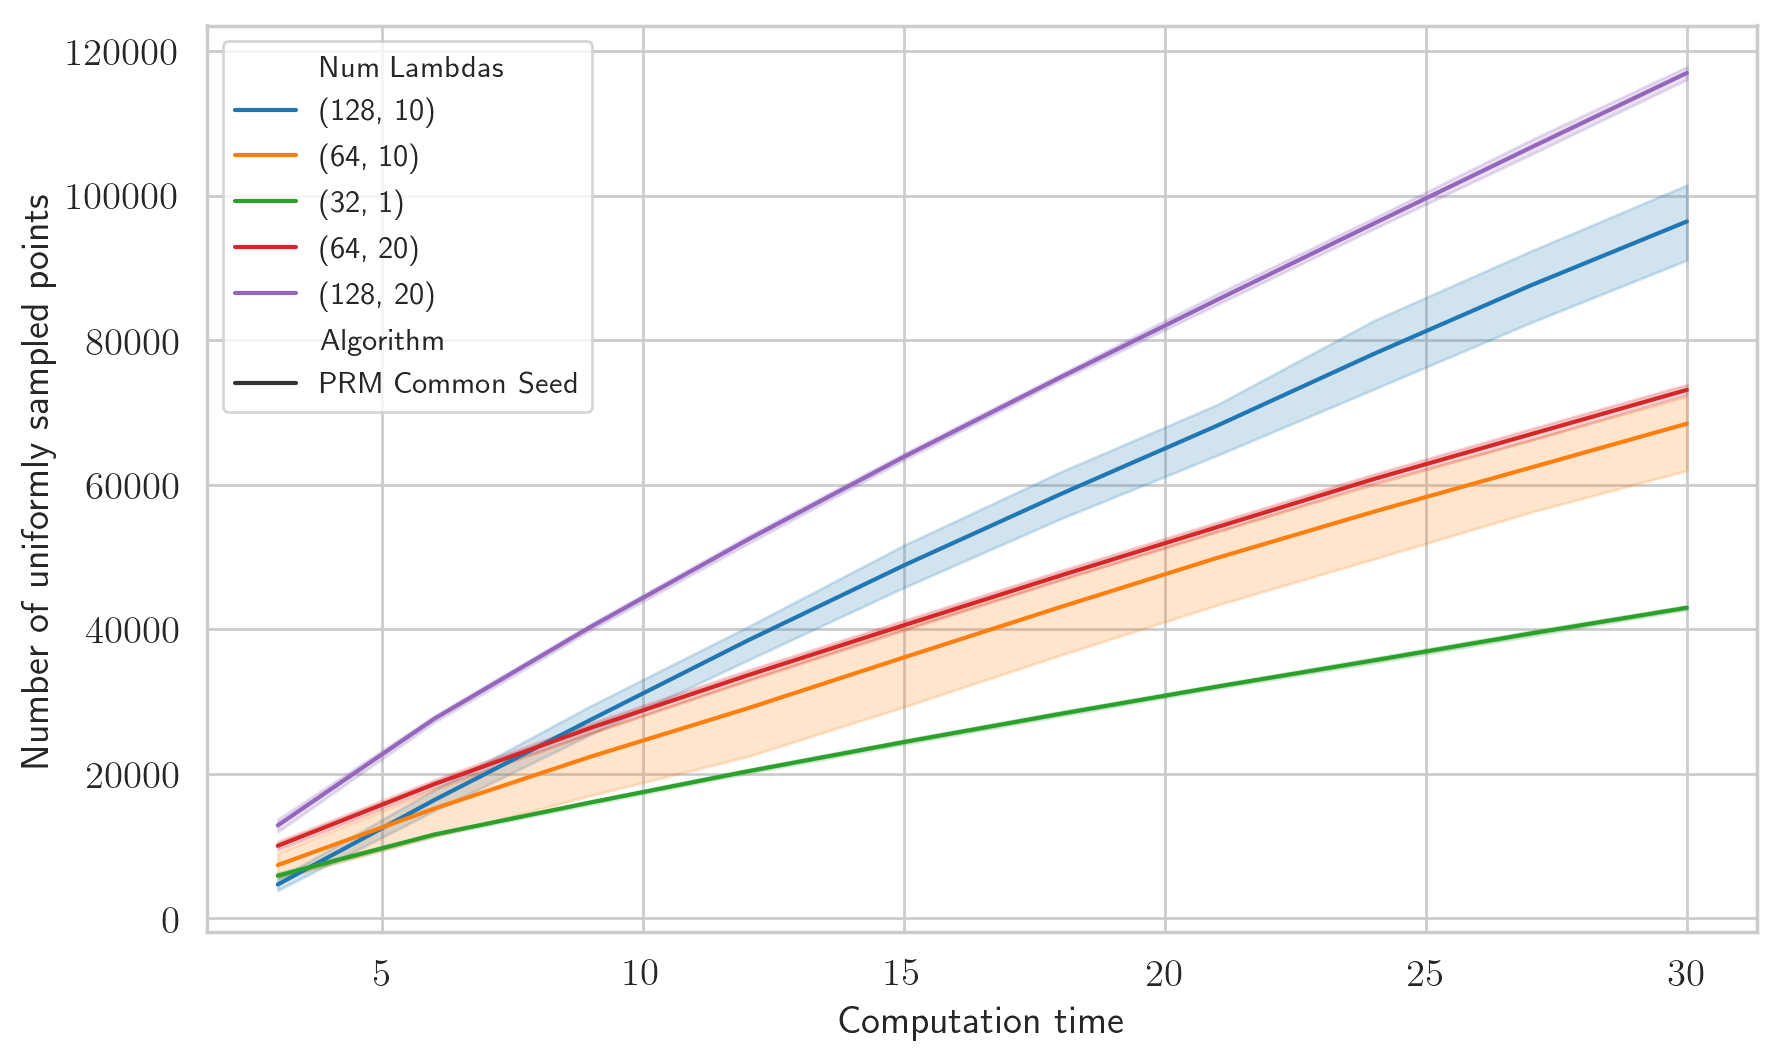

In [8]:
plt.figure(figsize=(10, 6), dpi=200)
sns.set(style="whitegrid")
g = sns.lineplot(data=df, x="time_limit", y="max_global_samples", 
                 hue="num_lambdas-num_samples", style="algorithm", estimator=np.mean, legend="full",
                 palette=global_palette
                )
ax = g.axes
fontsize = 14
ax.set_ylabel("Number of uniformly sampled points", fontsize=fontsize)
ax.set_xlabel("Computation time", fontsize=fontsize)
# import ipdb; ipdb.set_trace()
handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
    if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas"
    if label == "algorithm": labels[i] = "Algorithm"
    if label in algorithm_names: labels[i] = algorithm_names[label]
ax.legend(handles, labels)
ax.tick_params(labelsize=fontsize)

plt.savefig("{}/max_global_samples_{}.png".format(SAVE_ROOT, plot_pairs_id))
plt.show()

/Users/ragz/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


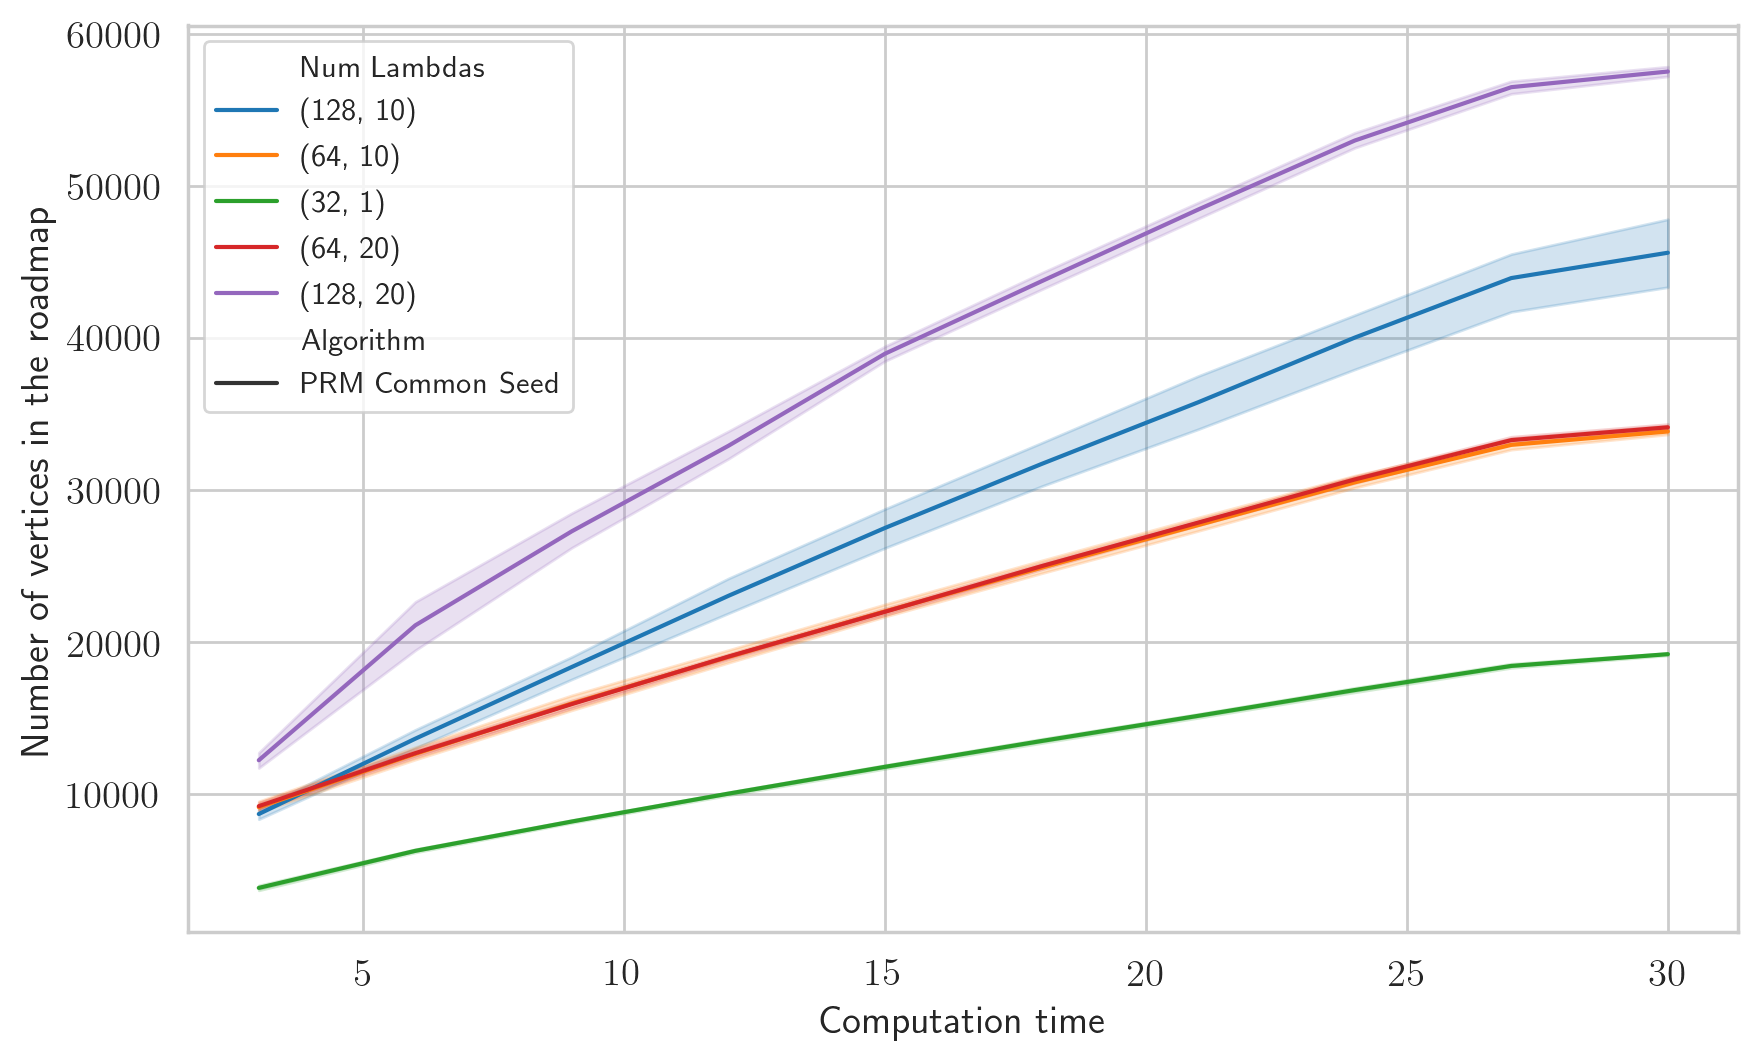

In [9]:
plt.figure(figsize=(10, 6), dpi=200)
sns.set(style="whitegrid")
g = sns.lineplot(data=df, x="time_limit", y="num_vertices", 
                 hue="num_lambdas-num_samples", estimator=np.mean, legend="full", style="algorithm",
                 palette=global_palette
                )
ax = g.axes
fontsize = 14
ax.set_ylabel("Number of vertices in the roadmap", fontsize=fontsize)
ax.set_xlabel("Computation time", fontsize=fontsize)
handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
    if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas"
    if label == "algorithm": labels[i] = "Algorithm"
    if label in algorithm_names: labels[i] = algorithm_names[label]
ax.legend(handles, labels, title_fontsize=12)
ax.tick_params(labelsize=fontsize)

plt.savefig("{}/num_vertices_{}.png".format(SAVE_ROOT, plot_pairs_id))
plt.show()

/Users/ragz/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


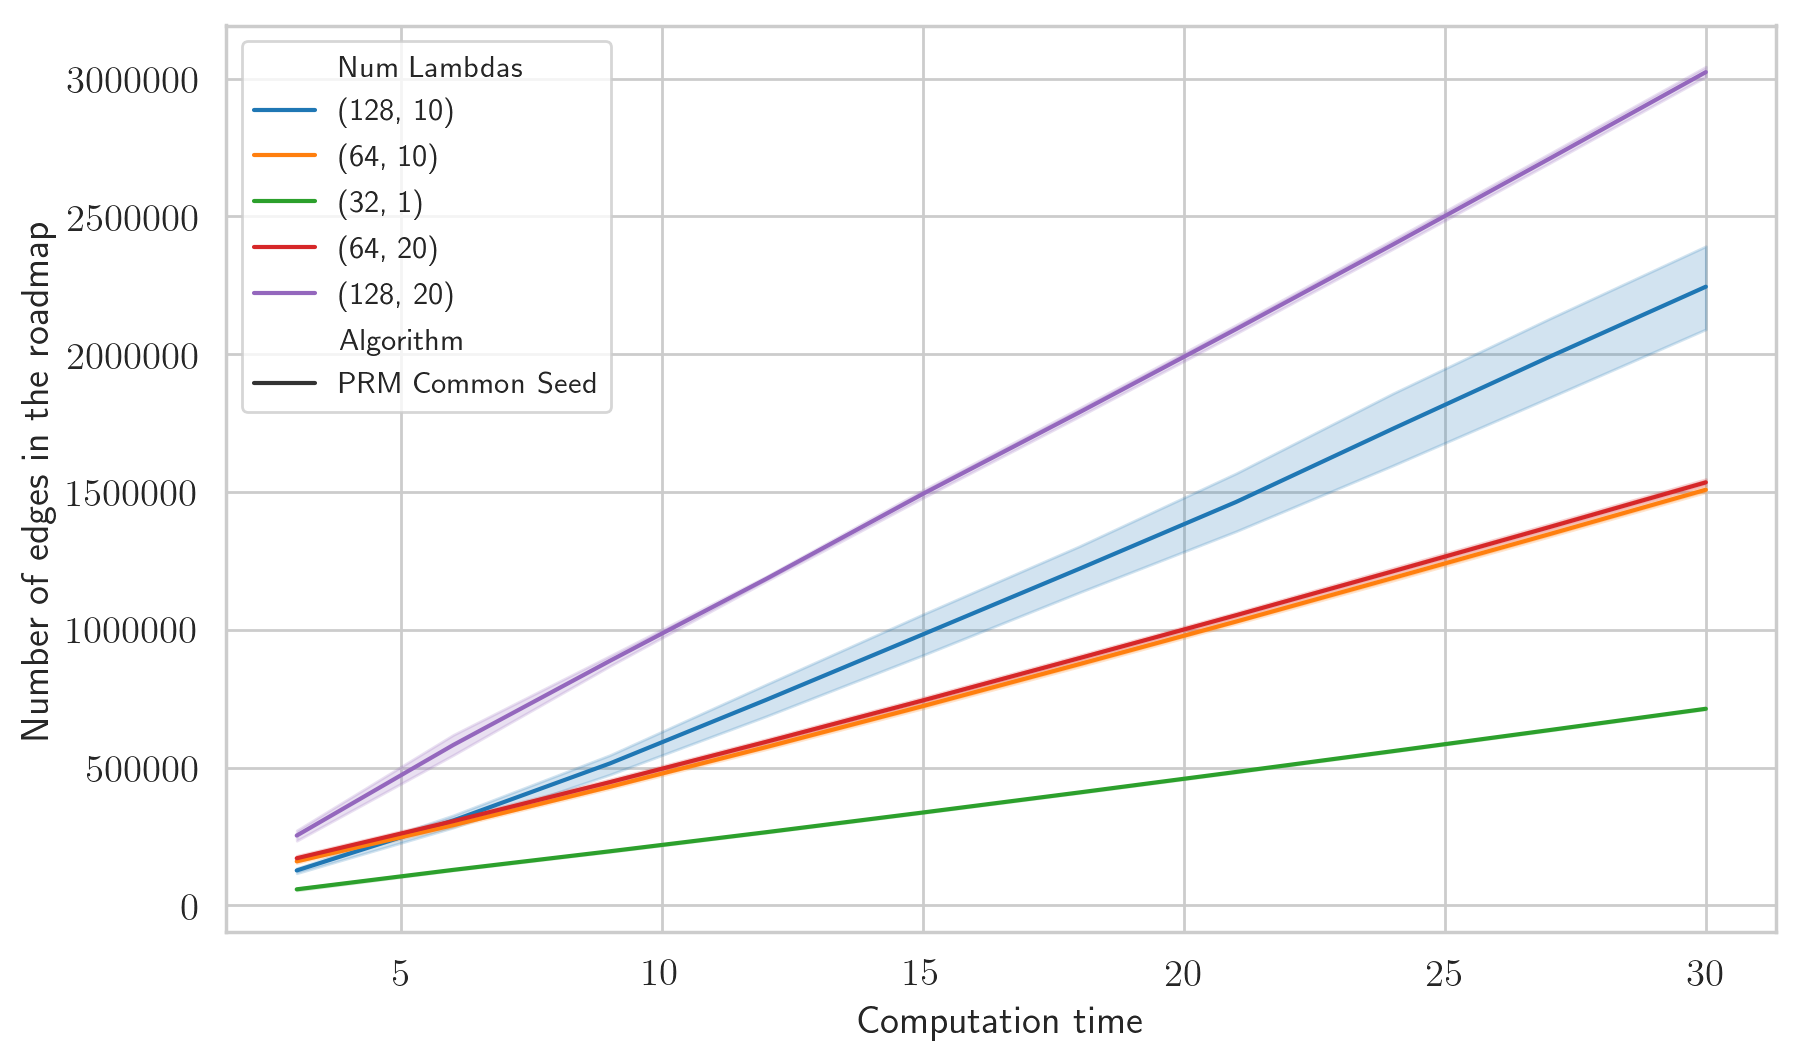

In [10]:
plt.figure(figsize=(10, 6), dpi=200)
sns.set(style="whitegrid")
g = sns.lineplot(data=df, x="time_limit", y="num_edges", 
                 hue="num_lambdas-num_samples", estimator=np.mean, legend="full", style="algorithm",
                 palette=global_palette
                )
ax = g.axes
fontsize = 14
ax.set_ylabel("Number of edges in the roadmap", fontsize=fontsize)
ax.set_xlabel("Computation time", fontsize=fontsize)
handles, labels = ax.get_legend_handles_labels()
for i, label in enumerate(labels):
    if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas"
    if label == "algorithm": labels[i] = "Algorithm"
    if label in algorithm_names: labels[i] = algorithm_names[label]
ax.legend(handles, labels, title_fontsize=12)
ax.tick_params(labelsize=fontsize)

plt.savefig("{}/num_edges_{}.png".format(SAVE_ROOT, plot_pairs_id))
plt.show()

### Start end comparisons

In [11]:
path_length_df = pd.read_csv("{}/path_length_data.csv".format(ROOT))
# path_length_df = path_length_df.groupby(['start', 'goal', 'time_limit', 'num_lambdas', 'num_samples'], as_index=False).agg({'distance': ['min']})
# path_length_df.columns = ['start', 'goal', 'time_limit', 'num_lambdas', 'num_samples', 'distance']
# path_length_df = path_length_df.sort_values(by=["time_limit", "start", "goal",  "distance", "num_lambdas"])
path_length_df['num_lambdas-num_samples'] = list(zip(path_length_df.num_lambdas, path_length_df.num_samples))
path_length_df = path_length_df[path_length_df['num_lambdas-num_samples'].isin(plot_pairs)]
path_length_df = path_length_df[path_length_df["scenario"] == scenario]
path_length_df = path_length_df[path_length_df["algorithm"].isin(algorithm_names.keys())]

path_length_df


,Unnamed: 0,algorithm,distance,goal,num_lambdas,num_samples,scenario,start,time_limit,num_lambdas-num_samples
400,400,prm_common_seed,13.6280,"0.283115208148956, 1.22028923034668, -0.648826...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
401,401,prm_common_seed,10.4379,"0.0983504801988602, 0.371139824390411, -0.0989...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
402,402,prm_common_seed,17.3433,"0.280426293611526, 0.207870095968246, -0.67702...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
403,403,prm_common_seed,13.6017,"0.346845000982285, 1.00893819332123, 0.0599395...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
404,404,prm_common_seed,11.5777,"0.268567472696304, 0.481422990560532, -0.11096...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
405,405,prm_common_seed,13.4131,"0.19839172065258, 0.934713244438171, -0.669023...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
406,406,prm_common_seed,13.2281,"0.346828371286392, 0.736882984638214, -0.73947...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
407,407,prm_common_seed,17.0426,"0.338340878486633, 0.818273425102234, -0.34039...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
408,408,prm_common_seed,14.5658,"0.168071642518044, 0.959626317024231, -0.27971...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"
409,409,prm_common_seed,12.5959,"0.156843602657318, 1.19895756244659, 0.8296977...",128,10,fetch1,"0.100000001490116, 1.57079637050629, 1.5707963...",30.0,"(128, 10)"


In [12]:
for (j, ((start, goal), group)) in enumerate(path_length_df.groupby(['start', 'goal'])):
    printable_group = group.reset_index()[["time_limit", "num_lambdas-num_samples", "distance", "algorithm"]]
    print(j)
#     print(i, printable_group)
    plt.figure(figsize=(10, 6), dpi=200)
    sns.set(style="whitegrid")
    g = sns.lineplot(data=printable_group, x="time_limit", y="distance", 
                     hue="num_lambdas-num_samples", estimator=np.median, palette=global_palette[:5],
                     style="algorithm",
                     err_style=None, ci=None,
                     legend="full", )
    ax = g.axes
    fontsize = 14
    ax.set_ylabel("Cost", fontsize=fontsize)
    ax.set_xlabel("Computation time", fontsize=fontsize)
    for i, label in enumerate(labels):
        if label == "num_lambdas-num_samples": labels[i] = "Num Lambdas"
        if label == "algorithm": labels[i] = "Algorithm"
        if label in algorithm_names: labels[i] = algorithm_names[label]
    ax.legend(handles, labels, title_fontsize=12)
    ax.tick_params(labelsize=fontsize)
    ax.set_title(str(j))
    plt.savefig("{}/goal{}.png".format(SAVE_ROOT, j))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [13]:
!convert {SAVE_ROOT}/*.png {SAVE_ROOT}/out.pdf
!open {SAVE_ROOT}/out.pdf